# **Passenger Density Analysis of Corridor 1 Transjakarta**

## **1. Problem Understanding**


**Introduction:**

The escalating issue of traffic congestion in Jakarta poses a significant challenge. As a potential solution, public transportation has emerged as a viable means to mitigate this problem. The primary cause of traffic jams is the excessive volume of personal vehicles that surpasses the road capacity. Factors such as comfort and safety greatly influence individuals' preference for personal vehicle usage. Consequently, addressing these pivotal factors becomes crucial in facilitating a transition from personal vehicles to public transportation.

One effective approach to gather insights on passengers' experiences regarding comfort and safety is to assess the density within a public transport fleet, such as buses. Excessively crowded bus leads to inconvenience and compromises passengers' safety. Thus, I aim to conduct an analysis focusing on the Passengers Density of Transjakarta Corridor 1. This analysis will provide a comprehensive understanding of the level of overcrowding on these buses.


**Goals:**

The analysis aims to achieve the following objectives:

1. Quantify passenger occupancy levels on Corridor 1 Transjakarta.

2. Analyze the factors influencing occupancy levels, such as bus stop locations, and surrounding infrastructure.

3. Develop recommendations and strategies to optimize passenger experience on Corridor 1 Transjakarta.

## **2. Data Understanding**

### **Import Packages**

In [4340]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import folium
import regex as re

### **Load Dataset**

Source 1: https://data.jakarta.go.id/dataset/data-penumpang-bus-transjakarta-januari-2021

Source 2: https://ppid.transjakarta.co.id/pusat-data/data-terbuka/transjakarta-gtfs-feed

#### **2.1 Main Dataset**

##### **2.1.1 Overview**

In [4341]:
df_passengers = pd.read_csv('TransJakarta Passengers 2021.csv')
df_passengers

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


The dataset provided comprises information about monthly passenger counts on Transjakarta routes in the year 2021. It consists of 1473 rows and 6 columns. Description of the columns:

1. tahun: Indicates the year in which the route data was recorded (2021).

2. bulan: Represents the specific month during which the route data was recorded.

3. jenis: Specifies the type of transportation mode (e.g., Mikrotrans, Angkutan Umum Integrasi, BRT) associated with the recorded route.

4. kode_trayek: Refers to a unique identifier assigned to each route.

5. trayek: Describes the origin and destination points of the route, providing information about the specific locations it connects.

6. jumlah penumpang: Indicates the total number of passengers recorded for each route during the given month and year.

This dataset allows for the analysis of monthly passenger trends on Transjakarta routes in 2021, enabling researchers to study the utilization patterns of different modes of transport and assess the popularity and demand for specific routes.

##### **2.1.2 Rename Columns**

In [4342]:
df_passengers.rename(columns={
    'tahun':'year',
    'bulan':'month',
    'jenis':'mode',
    'kode_trayek':'route_id',
    'trayek':'route',
    'jumlah_penumpang':'passengers'
}, inplace = True)
df_passengers.head()

,year,month,mode,route_id,route,passengers
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616


##### **2.1.3 Data Information**

In [4343]:
df_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        1473 non-null   int64 
 1   month       1473 non-null   int64 
 2   mode        1473 non-null   object
 3   route_id    1473 non-null   object
 4   route       1471 non-null   object
 5   passengers  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


##### **2.1.4 Data Cleaning**

**2.1.4.1 Missing Values**

In [4344]:
df_passengers.isna().sum()

year          0
month         0
mode          0
route_id      0
route         2
passengers    0
dtype: int64

Insights:
- There are 2 missing values in column 'route'.

In [4345]:
# Check missing values
df_passengers[df_passengers['route'].isna()]

,year,month,mode,route_id,route,passengers
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
796,2021,12,Mikrotrans,JAK.10A,NaN,33992


In [4346]:
# Impute missing values
df_passengers['route'] = np.where(df_passengers['route_id'] == 'JAK.10B', 'Gondangdia - Cikini via Kramat Raya', df_passengers['route'])
df_passengers['route'] = np.where(df_passengers['route_id'] == 'JAK.10A', 'Gondangdia - Cikini via Salemba Raya', df_passengers['route'])

# Confirm missing values
df_passengers.isna().sum()

year          0
month         0
mode          0
route_id      0
route         0
passengers    0
dtype: int64

**2.1.4.2 Merge 'year' and 'month' into 'date'**

In [4347]:
# Insert the date column at the first position (index 0)
df_passengers.insert(0, 'date', df_passengers['year'].astype(str) + '-' + df_passengers['month'].astype(str))
df_passengers.head(2)

,date,year,month,mode,route_id,route,passengers
0,2021-10,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021-10,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711


In [4348]:
# Convert 'date' column to datetime format and add the month end offset
df_passengers['date'] = pd.to_datetime(df_passengers['date']) + pd.offsets.MonthEnd(0)
df_passengers.head(2)

,date,year,month,mode,route_id,route,passengers
0,2021-10-31,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021-10-31,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711


In [4349]:
# Drop 'year' and 'month'
df_passengers.drop(columns = ['year', 'month'], inplace = True)
df_passengers.head(2)

,date,mode,route_id,route,passengers
0,2021-10-31,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021-10-31,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711


**2.1.4.3 Check for Typos in Every Column**

**- 'mode'**

In [4350]:
df_passengers['mode'].unique()

array(['Mikrotrans', 'BRT', 'Angkutan Umum Integrasi'], dtype=object)

Insight:
- There is no typos in 'mode'

**- 'code'**

In [4351]:
np.sort(df_passengers['route_id'].unique())

array(['1', '10', '10K', '11', '11D', '11Q', '12', '12A', '12B', '13',
       '1A', '1A ', '1B', '1C', '1E', '1F', '1H', '1M', '1N', '1P', '1Q',
       '1R', '2', '2P', '2Q', '3', '3E', '3E ', '4', '4B', '4F', '5',
       '5B', '5F', '5M', '6', '6C', '6F', '6H', '6M', '6N', '6Q', '6R',
       '7', '7A', '7B', '7D', '7P', '8', '8C', '8D', '8E', '8K', '9',
       '9D', '9E', '9H', 'GR2', 'GR3', 'GR4', 'GR5', 'JA.77', 'JAK,19',
       'JAK. 10B', 'JAK.01', 'JAK.02', 'JAK.03', 'JAK.04', 'JAK.05',
       'JAK.06', 'JAK.07', 'JAK.08', 'JAK.09', 'JAK.10', 'JAK.10A',
       'JAK.10B', 'JAK.11', 'JAK.112', 'JAK.117', 'JAK.12', 'JAK.13',
       'JAK.14', 'JAK.15', 'JAK.16', 'JAK.17', 'JAK.18', 'JAK.20',
       'JAK.21', 'JAK.22', 'JAK.24', 'JAK.25', 'JAK.26', 'JAK.27',
       'JAK.28', 'JAK.29', 'JAK.30', 'JAK.31', 'JAK.32', 'JAK.33',
       'JAK.34', 'JAK.35', 'JAK.36', 'JAK.37', 'JAK.38', 'JAK.39',
       'JAK.40', 'JAK.41', 'JAK.42', 'JAK.43', 'JAK.44', 'JAK.45',
       'JAK.46', 'JAK.47', 'J

In [4352]:
# Patterns

# 1-99
# 1A - 99Z
# GR1-99
# JAK.1 - JAK.999
# JAK.01A - JAK.999Z

In [4353]:
# Find typos that do not fit to the patterns
arr = np.sort(df_passengers['route_id'].unique())

import re

# Define the pattern to identify typos
pattern = r'^(?:\d{1,2}(?:[A-Z])?|GR\d{1,2}|JAK\.(?:\d{1,3}(?:[A-Z])?))$'

# Iterate over the array elements
anomalies = []
for element in arr:
    if not re.match(pattern, element):
        anomalies.append(element)

# Print typos
print(anomalies)


['1A ', '3E ', 'JA.77', 'JAK,19', 'JAK. 10B']


Insights:
-   Typos have found.

In [4354]:
# Handling typos

df_passengers['route_id'] = np.where(df_passengers['route_id'] == '1A ', '1A', df_passengers['route_id'])
df_passengers['route_id'] = np.where(df_passengers['route_id'] == '3E ', '3E', df_passengers['route_id'])
df_passengers['route_id'] = np.where(df_passengers['route_id'] == 'JA.77', 'JAK.77', df_passengers['route_id'])
df_passengers['route_id'] = np.where(df_passengers['route_id'] == 'JAK,19', 'JAK.19', df_passengers['route_id'])
df_passengers['route_id'] = np.where(df_passengers['route_id'] == 'JAK. 10B', 'JAK.10B', df_passengers['route_id'])

df_passengers.head()

,date,mode,route_id,route,passengers
0,2021-10-31,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021-10-31,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021-10-31,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021-10-31,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021-10-31,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616


**- 'route'**

In [4355]:
df_passengers.head(2)

,date,mode,route_id,route,passengers
0,2021-10-31,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021-10-31,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711


In [4356]:
# Change the separator
df_passengers['route'] = df_passengers['route'].str.replace(' - ', '-')

# Remove double spaces
df_passengers['route'] = df_passengers['route'].str.replace('  ', ' ')


Find Typos

In [4357]:
# Create a DataFrame consists of unique route
df_route_unique = pd.DataFrame(np.sort(df_passengers['route'].unique()), columns= ['route'])
df_route_unique

,route
0,Andara-Stasiun Universitas Pancasila
1,Batu Sari-Tanah Abang
2,Bintara-Cipinang Indah
3,Bintaro-Blok M
4,Blok M-Andara
...,...
131,Terminal Rawamangun-Cipinang Muara
132,Terminal Tanah Merah-Pulo Gadung
133,Terminal Tanjung Priok-Ancol Barat
134,Tongtek-Cililitan


In [4358]:
# Generate respective route_id for every unique route
df_route_unique = df_route_unique.merge(df_passengers[['route', 'route_id']], on = 'route').sort_values(by = 'route_id').drop_duplicates()
df_route_unique

,route,route_id
71,Blok M-Kota,1
1354,Tanjung Priok-PGC 2,10
1379,Tanjung Priok-Senen via Taman BMW,10K
916,Pulo Gebang-Kampung Melayu,11
931,Pulo Gebang-Pulo Gadung 2 via PIK,11D
...,...,...
1342,Tanjung Priok-Jembatan Item,JAK.77
989,Rawa Buaya-Rawa Kompeni,JAK.80
1421,Terminal Kampung Melayu-Kapin Raya,JAK.84
25,Bintara-Cipinang Indah,JAK.85


In [4359]:
# Check the number of route_id
df_route_num = df_route_unique.groupby(by = 'route_id').count().reset_index()
df_route_num.rename(columns = {'route':'route_count'}, inplace = True)
df_route_num

,route_id,route_count
0,1,1
1,10,1
2,10K,1
3,11,1
4,11D,1
...,...,...
126,JAK.77,1
127,JAK.80,1
128,JAK.84,1
129,JAK.85,1


In [4360]:
# If route_count > 1, it means that route_id has more than 1 different routes
df_route_typo = df_route_num[df_route_num['route_count'] > 1]
df_route_typo

,route_id,route_count
10,1A,2
25,3E,2
26,4,2
59,JAK.01,2
70,JAK.10B,2
102,JAK.41,2


In [4361]:
# Merge df_route_typo with df_route_unique to generate typos
df_route_typo = df_route_typo.merge(df_route_unique, on = 'route_id', how = 'left')
df_route_typo.rename(columns = {'route_x':'route_count', 'route_y':'route'}, inplace = True)
df_route_typo

,route_id,route_count,route
0,1A,2,Pantai Maju-Balai Kota
1,1A,2,PIK-Balai Kota
2,3E,2,Sentraland Cengkareng-Puri Kembangan
3,3E,2,Puri Kembangan-Sentraland Cengkareng
4,4,2,Pulo Gadung 2-Tosari
5,4,2,Pulo Ggadung 2-Tosari
6,JAK.01,2,Ttanjung Priok-Plumpang
7,JAK.01,2,Tanjung Priok-Plumpang
8,JAK.10B,2,Gondangdia-Cikini via Kramat Raya
9,JAK.10B,2,Gondangdia-Cikini via Kramat Jaya


Insights:
- Has the same route with different route_id:
    - Pantai Maju-Balai Kota 1A, PIK-Balai Kota	1A
    - Sentraland Cengkareng-Puri Kembangan 3E, Puri Kembangan-Sentraland Cengkareng 3E
<br><br>
- Typos:
    - Pulo Gadung 2-Tosari 4, Pulo Ggadung 2-Tosari	4
    - Ttanjung Priok-Plumpang	JAK.01, Tanjung Priok-Plumpang JAK.01
    - Gondangdia-Cikini via Kramat Raya	JAK.10B, Gondangdia-Cikini via Kramat Jaya	JAK.10B
    - Kampung Melayu-Pulo Gadung JAK.41, Kampung Melayu-Ppulo Gadung JAK.41


In [4362]:
# Import routes.txt to correct route_name for respective route_id
df_routes = pd.read_csv('routes.txt')
df_routes

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,10A,Tije,10A,Rusun Marunda - Tanjung Priok,NaN,3,NaN,9B7172,000000
1,10B,Tije,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang,NaN,3,NaN,9B7172,000000
2,10D,Tije,10D,Kampung Rambutan - Tanjung Priok,NaN,3,NaN,9B1F21,FFFFFF
3,10H,Tije,10H,Tanjung Priok - Blok M,NaN,3,NaN,9B1F21,FFFFFF
4,10K,Tije,10K,Tanjung Priok - Senen via Taman BMW,NaN,3,NaN,9B474A,FFFFFF
...,...,...,...,...,...,...,...,...,...
232,PRJ2,Tije,PRJ2,Kampung Melayu - JIEXPO Kemayoran,NaN,3,NaN,D48961,000000
233,PRJ3,Tije,PRJ3,Pulo Gadung 1 - JIEXPO Kemayoran,NaN,3,NaN,54659C,FFFFFF
234,T12,Tije,T12,Poris Plawad - Juanda,NaN,3,NaN,FFFF6D,000000
235,7R,Tije,7R,Cibubur - Pluit,NaN,3,NaN,916131,FFFFFF


In [4363]:
# Show the correct route name
df_route_num[df_route_num['route_count'] > 1].merge(df_routes, on = 'route_id', how = 'left')

,route_id,route_count,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,1A,2,Tije,1A,Pantai Maju - Balai Kota,NaN,3,NaN,D65E62,000000
1,3E,2,Tije,3E,Puri Kembangan - Sentraland Cengkareng,NaN,3,NaN,FDDB6A,000000
2,4,2,Tije,4,Pulo Gadung 2 - Dukuh Atas 2,NaN,3,NaN,512C62,FFFFFF
3,JAK.01,2,Tije,JAK.01,Tanjung Priok - Plumpang,NaN,3,NaN,00609C,FFFFFF
4,JAK.10B,2,Tije,JAK.10B,Gondangdia - Cikini via Kramat Raya,NaN,3,NaN,00609C,FFFFFF
5,JAK.41,2,Tije,JAK.41,Kampung Melayu - Pulo Gadung,NaN,3,NaN,00609C,FFFFFF


In [4364]:
# Merge df_passengers and df_routes to fix typos and duplicates
df_passengers = df_passengers.merge(df_routes, on='route_id', how='left')

# Fill the null values in the df_passengers['route_long_name'] with df_passengers['route']
df_passengers['route_long_name'] = np.where(pd.isnull(df_passengers['route_long_name']), df_passengers['route'], df_passengers['route_long_name'])

In [4365]:
# Obtain the necessary columns
df_passengers = df_passengers[['date', 'mode', 'route_id', 'route_long_name', 'passengers']]

# Sort DataFrame based on the date and route_id
df_passengers = df_passengers.sort_values(by = ['date', 'route_id'])

In [4366]:
# Rename route_long_name to route
df_passengers = df_passengers.rename(columns  = {'route_long_name': 'route'})
df_passengers.head()

,date,mode,route_id,route,passengers
572,2021-01-31,BRT,1,Blok M - Kota,773717
571,2021-01-31,BRT,10,Tanjung Priok - PGC 2,356211
609,2021-01-31,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,41881
570,2021-01-31,BRT,11,Pulo Gebang - Matraman,134632
608,2021-01-31,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,61434


Insights:
- 'route' typos have been fixed.

**2.1.2.4 Create new columns that consist of origin and destination**

In [4367]:
# Change the separator
df_passengers['route'] = df_passengers['route'].str.replace(' - ', '-')

# Remove double spaces
df_passengers['route'] = df_passengers['route'].str.replace('  ', ' ')

In [4368]:
# origin
df_passengers.insert(4, 'origin', df_passengers['route'].str.split('-', expand=True)[0].str.rstrip())

# destination
df_passengers.insert(5, 'destination', df_passengers['route'].str.split('-', expand=True)[1].str.lstrip())

df_passengers.head()

,date,mode,route_id,route,origin,destination,passengers
572,2021-01-31,BRT,1,Blok M-Kota,Blok M,Kota,773717
571,2021-01-31,BRT,10,Tanjung Priok-PGC 2,Tanjung Priok,PGC 2,356211
609,2021-01-31,Angkutan Umum Integrasi,10K,Tanjung Priok-Senen via Taman BMW,Tanjung Priok,Senen via Taman BMW,41881
570,2021-01-31,BRT,11,Pulo Gebang-Matraman,Pulo Gebang,Matraman,134632
608,2021-01-31,Angkutan Umum Integrasi,11D,Pulo Gebang-Pulo Gadung 2 via PIK,Pulo Gebang,Pulo Gadung 2 via PIK,61434


In [4369]:
# Destination with none values
df_passengers[df_passengers['destination'].isnull()].head()

,date,mode,route_id,route,origin,destination,passengers
573,2021-01-31,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,Kota Tua Explorer,None,261
731,2021-05-31,Angkutan Umum Integrasi,GR2,Tanah Abang Explorer,Tanah Abang Explorer,None,3945
734,2021-05-31,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,Kota Tua Explorer,None,24
489,2021-06-30,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,Kota Tua Explorer,None,33
1223,2021-07-31,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,Kota Tua Explorer,None,11


In [4370]:
# Fix destination with None values
df_passengers['destination'] = np.where(df_passengers['destination'].isnull(), df_passengers['route'], df_passengers['destination'])

In [4371]:
# Change the separator
df_passengers['route'] = df_passengers['route'].str.replace('-', ' - ')

In [4372]:
df_passengers.head()

,date,mode,route_id,route,origin,destination,passengers
572,2021-01-31,BRT,1,Blok M - Kota,Blok M,Kota,773717
571,2021-01-31,BRT,10,Tanjung Priok - PGC 2,Tanjung Priok,PGC 2,356211
609,2021-01-31,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,Tanjung Priok,Senen via Taman BMW,41881
570,2021-01-31,BRT,11,Pulo Gebang - Matraman,Pulo Gebang,Matraman,134632
608,2021-01-31,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Pulo Gebang,Pulo Gadung 2 via PIK,61434


**2.1.2.5 Create a Pivot Table**

In [4373]:
# Create the pivot table
pt_passengers = df_passengers.pivot_table(index=['route_id', 'route', 'mode', 'origin', 'destination'], columns='date', values='passengers')
pt_passengers.head()

,,,,date,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
route_id,route,mode,origin,destination,,,,,,,,,,,,
1,Blok M - Kota,BRT,Blok M,Kota,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,903783.0,1073929.0,1131439.0
10,Tanjung Priok - PGC 2,BRT,Tanjung Priok,PGC 2,356211.0,349572.0,427032.0,424169.0,396760.0,393998.0,175900.0,213453.0,315308.0,369184.0,421487.0,419198.0
10K,Tanjung Priok - Senen via Taman BMW,Angkutan Umum Integrasi,Tanjung Priok,Senen via Taman BMW,41881.0,31243.0,36891.0,34736.0,31667.0,32798.0,23069.0,29478.0,32614.0,34615.0,34498.0,0.0
11,Pulo Gebang - Matraman,BRT,Pulo Gebang,Matraman,134632.0,134665.0,166555.0,162931.0,154256.0,148933.0,62391.0,74753.0,116020.0,135543.0,148930.0,163776.0
11D,Pulo Gebang - Pulo Gadung 2 via PIK,Angkutan Umum Integrasi,Pulo Gebang,Pulo Gadung 2 via PIK,61434.0,47628.0,58186.0,55677.0,51102.0,50089.0,33801.0,40578.0,48895.0,54197.0,59155.0,0.0


In [4374]:
df_passengers.to_csv('df_passengers_clean.csv') # DataFrame
pt_passengers.to_csv('pt_passengers_clean.csv') # Pivot Table

Insights:
- The data has been cleaned and ready to use.
- Here we are dealing with time-series data.

### **2.2 Supporting Dataset**

#### **Load Supporting Data**

In [4375]:
df_frequencies = pd.read_csv('frequencies.txt')
df_routes = pd.read_csv('routes.txt')
df_shapes = pd.read_csv('shapes.txt')
df_stop_times = pd.read_csv('stop_times.txt')
df_stops = pd.read_csv('stops.txt')
df_transfers = pd.read_csv('transfers.txt')
df_trips = pd.read_csv('trips.txt')

#### **Data Set Relationship**

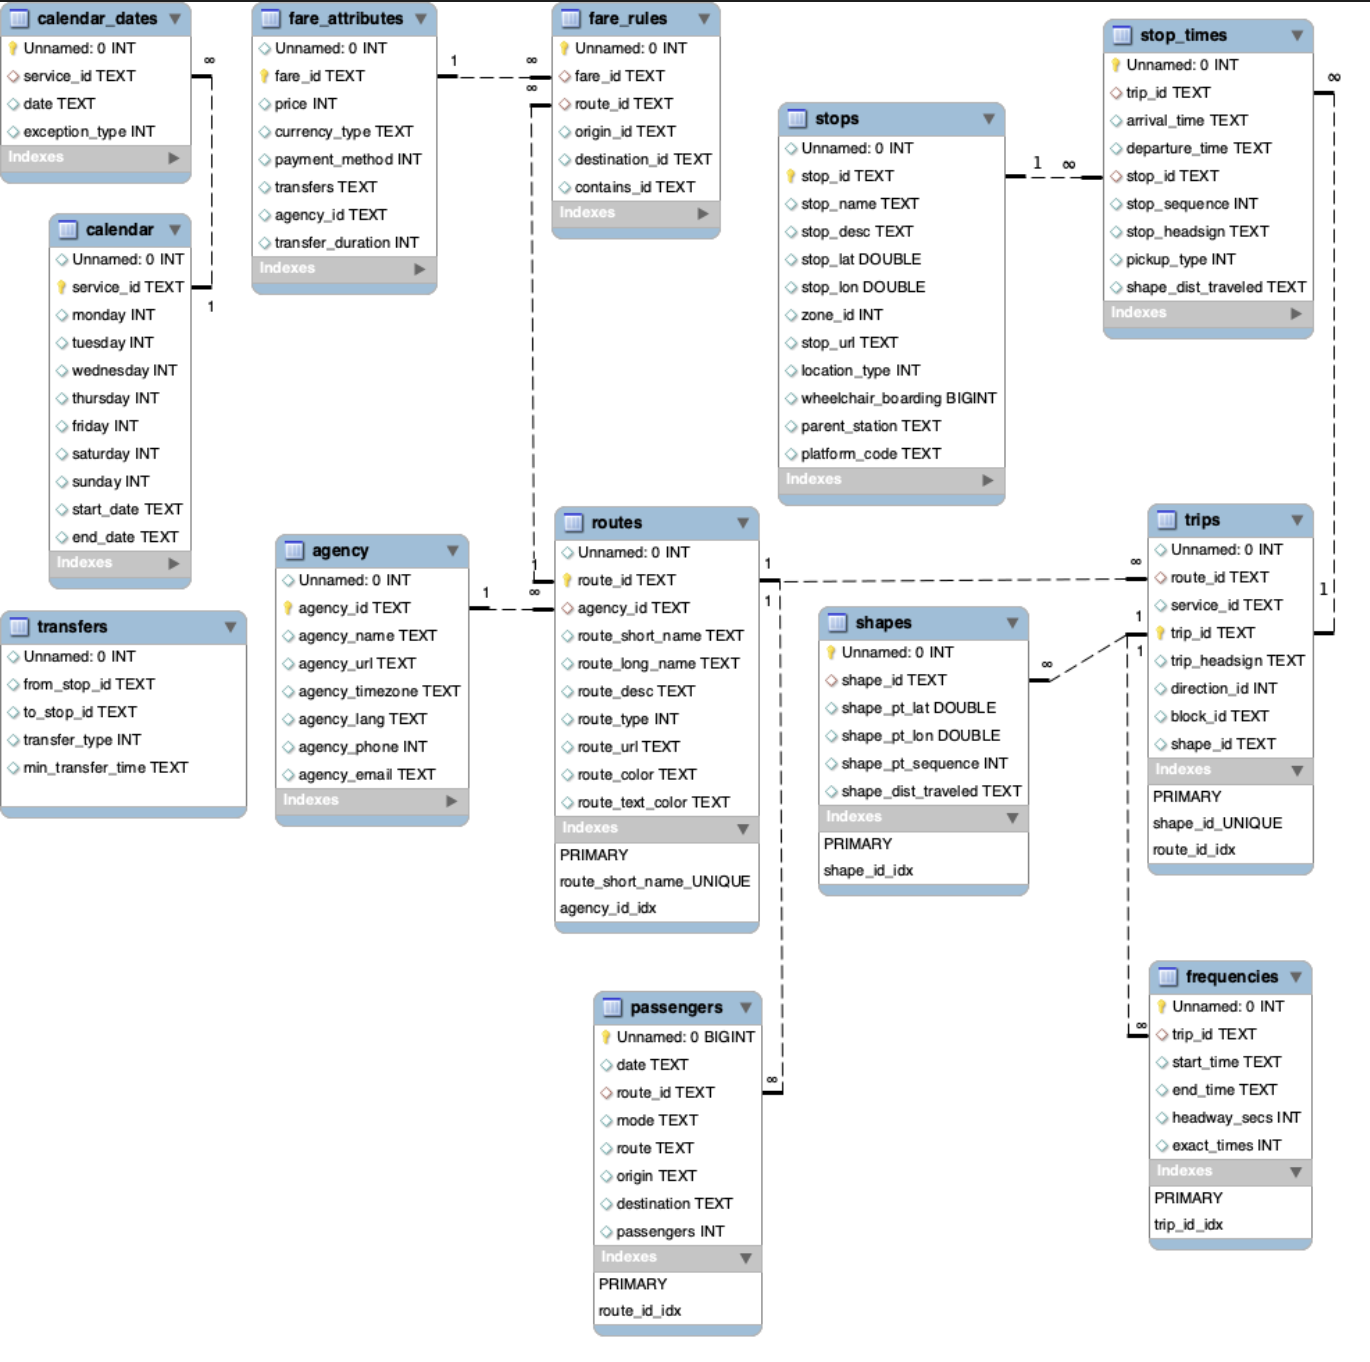

In [4376]:
from PIL import Image
from IPython.display import display

# Open the image file
image = Image.open('Transjakarta Relational Data.png')  # Replace "path_to_image_file.jpg" with the actual file path

# Display the image
display(image)

---

##### **2.2.1 df_trips**

In [4377]:
df_trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,1,SH,1-R05,Blok M - Kali Besar Barat,0,NaN,1-R05_shp
1,1,SH,1-R06,Kali Besar Barat - Blok M,1,NaN,1-R06_shp
2,10,SH,10-R01,Tanjung Priok - PGC 2,0,NaN,10-R01_shp
3,10,SH,10-R02,PGC 2 - Tanjung Priok,1,NaN,10-R02_shp
4,10A,SH,10A-R01,Rusun Marunda - Tanjung Priok,0,NaN,10A-R01_shp


**2.2.1.1 Data Overview**

The dataset contain information about trips of Transjakarta. The dataset consist of:

**route_id:** It represents the unique identifier for a particular route.

**service_id:** This column indicates the service ID associated with the trip. It represents different service types or schedules.

**trip_id:** It is the unique identifier for a specific trip.

**trip_headsign:** This column provides the destination or headsign for the trip, indicating where the trip is going.

**direction_id:** It represents the direction of the trip. Typically, this could be 0 or 1, indicating different directions for a given route.

**block_id:** This column might be used to identify a specific block or grouping of trips.

**shape_id:** It represents the shape identifier associated with the trip, which could refer to the specific path or route the trip follows.

In [4378]:
# Create a function to describe the dataframe
def generate_dataframe_description(df):
    items = []

    for col in df.columns:
        sample_size = min(3, df[col].nunique())
        items.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(), list(df[col].drop_duplicates().values)])

    df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                           data=items)
    
    return df_desc

In [4379]:
# Data set description
generate_dataframe_description(df_trips)

,dataFeatures,dataType,null,unique,uniqueSample
0,route_id,object,0,237,"[1, 10, 10A, 10B, 10D, 10H, 10K, 10ST, 11, 11B..."
1,service_id,object,0,5,"[SH, HK, HL, HR, HM]"
2,trip_id,object,0,484,"[1-R05, 1-R06, 10-R01, 10-R02, 10A-R01, 10A-R0..."
3,trip_headsign,object,0,450,"[Blok M - Kali Besar Barat, Kali Besar Barat -..."
4,direction_id,int64,0,2,"[0, 1]"
5,block_id,float64,484,0,[nan]
6,shape_id,object,0,484,"[1-R05_shp, 1-R06_shp, 10-R01_shp, 10-R02_shp,..."


**2.2.1.2 Data Cleaning**

In [4380]:
# Drop block_id
df_trips = df_trips.drop(columns = ['block_id'])
df_trips.head(2)

,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id
0,1,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp
1,1,SH,1-R06,Kali Besar Barat - Blok M,1,1-R06_shp


In [4381]:
# Obtain only direction_id = 0
df_trips = df_trips[df_trips['direction_id'] == 0]
df_trips.head(2)

,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id
0,1,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp
2,10,SH,10-R01,Tanjung Priok - PGC 2,0,10-R01_shp


In [4382]:
# Get only 'SH' and 'HR' for service_id
df_trips = df_trips[(df_trips['service_id'] == 'SH') | (df_trips['service_id'] == 'HR')]
df_trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id
0,1,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp
2,10,SH,10-R01,Tanjung Priok - PGC 2,0,10-R01_shp
4,10A,SH,10A-R01,Rusun Marunda - Tanjung Priok,0,10A-R01_shp
6,10B,SH,10B-R01,Rusun Cipinang Besar Selatan - Penas Kalimalang,0,10B-R01_shp
10,10H,SH,10H-R03,Tanjung Priok - Blok M,0,10H-R03_shp


##### **2.2.2 df_frequencies**

In [4383]:
df_frequencies

,trip_id,start_time,end_time,headway_secs,exact_times
0,10A-R01,05:00:00,06:00:00,1200,0
1,10A-R01,06:00:00,09:00:00,600,0
2,10A-R01,09:00:00,16:00:00,1200,0
3,10A-R01,16:00:00,20:00:00,600,0
4,10A-R01,20:00:00,22:00:00,1200,0
...,...,...,...,...,...
2152,PRJ3-R02HL,20:00:00,24:00:00,1200,0
2153,T12-R03,05:00:00,06:00:00,720,0
2154,T12-R02,18:00:00,19:00:00,720,0
2155,7R-R01,05:00:00,06:00:00,1800,0


The dataset contain information about trips frequencies, including the trip ID, start time, end time, headway (interval between trips in seconds), and whether the times are exact.

Let's go through each column to understand its meaning:

**trip_id:** It represents the unique identifier for a specific trip.

**start_time:** This column indicates the start time of the trip in the format of HH:MM:SS.

**end_time:** It represents the end time of the trip in the format of HH:MM:SS.

**headway_secs:** This column provides the interval or headway between trips in seconds. It specifies the time gap between the start of one trip and the start of the next trip.

**exact_times:** It indicates whether the times specified in the dataset are exact or approximate. A value of 0 suggests that the times are not exact.

In [4384]:
# Dataset description
generate_dataframe_description(df_frequencies)

,dataFeatures,dataType,null,unique,uniqueSample
0,trip_id,object,0,484,"[10A-R01, 10A-R02, 10B-R01, 10B-R02, 10D-R01, ..."
1,start_time,object,0,15,"[05:00:00, 06:00:00, 09:00:00, 16:00:00, 20:00..."
2,end_time,object,0,19,"[06:00:00, 09:00:00, 16:00:00, 20:00:00, 22:00..."
3,headway_secs,int64,0,11,"[1200, 600, 300, 180, 90, 150, 900, 1800, 2400..."
4,exact_times,int64,0,1,[0]


In [4385]:
# Drop exact_times
df_frequencies = df_frequencies.iloc[:,:-1]
df_frequencies.head()

,trip_id,start_time,end_time,headway_secs
0,10A-R01,05:00:00,06:00:00,1200
1,10A-R01,06:00:00,09:00:00,600
2,10A-R01,09:00:00,16:00:00,1200
3,10A-R01,16:00:00,20:00:00,600
4,10A-R01,20:00:00,22:00:00,1200


##### **2.2.3 df_shapes**

In [4386]:
df_shapes

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,0mpt,-6.185495,106.811071,0,NaN
1,0mpt,-6.185418,106.811062,1,NaN
2,0mpt,-6.185005,106.811015,2,NaN
3,0mpt,-6.184842,106.811009,3,NaN
4,0mpt,-6.184693,106.811047,4,NaN
...,...,...,...,...,...
112806,2C-R03HL_shp,-6.145580,106.848860,103,NaN
112807,2C-R03HL_shp,-6.145170,106.848790,104,NaN
112808,2C-R03HL_shp,-6.145050,106.848670,105,NaN
112809,2C-R03HL_shp,-6.144970,106.848630,106,NaN


The dataset contains information about shapes or paths associated with trips.

**shape_id:** It represents the unique identifier for a specific shape or path.

**shape_pt_lat:** This column indicates the latitude coordinate of a point on the shape or path.

**shape_pt_lon:** It represents the longitude coordinate of a point on the shape or path.

**shape_pt_sequence:** This column provides the sequence or order of points on the shape or path. It indicates the position of a point within the shape or path.

**shape_dist_traveled:** It represents the distance traveled along the shape or path. This column might indicate the cumulative distance traveled from the starting point of the shape.

In [4387]:
# Dataset description
generate_dataframe_description(df_shapes)

,dataFeatures,dataType,null,unique,uniqueSample
0,shape_id,object,0,484,"[0mpt, 0n91, 0nuu, 10A-R01_shp, 10A-R02_shp, 1..."
1,shape_pt_lat,float64,0,50012,"[-6.185495, -6.185418, -6.185005, -6.184842, -..."
2,shape_pt_lon,float64,0,50716,"[106.811071, 106.811062, 106.811015, 106.81100..."
3,shape_pt_sequence,int64,0,532,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,shape_dist_traveled,float64,112811,0,[nan]


In [4388]:
# Drop shape_dist_traveled
df_shapes = df_shapes.iloc[:,:-1]
df_shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,0mpt,-6.185495,106.811071,0
1,0mpt,-6.185418,106.811062,1
2,0mpt,-6.185005,106.811015,2
3,0mpt,-6.184842,106.811009,3
4,0mpt,-6.184693,106.811047,4


##### **2.2.4 df_stop_times**

In [4389]:
df_stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,shape_dist_traveled
0,10A-R01,05:00:00,05:00:10,B03282P,0,NaN,0,NaN
1,10A-R01,05:00:44,05:00:54,B03283P,1,NaN,0,NaN
2,10A-R01,05:02:31,05:02:41,B05078P,2,NaN,0,NaN
3,10A-R01,05:05:34,05:05:44,B06039P,3,NaN,0,NaN
4,10A-R01,05:06:29,05:06:39,B00136P,4,NaN,0,NaN
...,...,...,...,...,...,...,...,...
13134,2C-R04HL,05:00:00,05:00:10,P00288,0,NaN,0,NaN
13135,2C-R04HL,05:21:56,05:22:06,P00148,1,NaN,0,NaN
13136,2C-R04HL,05:24:04,05:24:14,P00021,2,NaN,0,NaN
13137,2C-R04HL,05:33:05,05:33:15,P00122,3,NaN,0,NaN


The dataset df_stops_times contain information about the stops and times of Transjakarta trips.

- **trip_id:** Identifier for the Transjakarta trip.

- **arrival_time:** The time when the bus arrives at a particular stop during the trip.

- **departure_time:** The time when the bus departs from a particular stop during the trip.

- **stop_id:** Identifier for the Transjakarta stop.

- **stop_sequence:** The order or sequence number of the stop within the trip.

- **stop_headsign:** The sign or label indicating the destination or direction of the Transjakarta trip at the particular stop.

- **pickup_type:** The type of passenger pickup at the stop (0 represents regular pickup).

- **shape_dist_traveled:** The distance traveled from the start of the Transjakarta trip until reaching the current stop.

In [4390]:
# Dataset description
generate_dataframe_description(df_stop_times)

,dataFeatures,dataType,null,unique,uniqueSample
0,trip_id,object,0,484,"[10A-R01, 10A-R02, 10B-R01, 10D-R01, 10D-R02, ..."
1,arrival_time,object,0,5288,"[05:00:00, 05:00:44, 05:02:31, 05:05:34, 05:06..."
2,departure_time,object,0,5288,"[05:00:10, 05:00:54, 05:02:41, 05:05:44, 05:06..."
3,stop_id,object,0,6342,"[B03282P, B03283P, B05078P, B06039P, B00136P, ..."
4,stop_sequence,int64,0,78,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
5,stop_headsign,float64,13139,0,[nan]
6,pickup_type,int64,0,1,[0]
7,shape_dist_traveled,float64,13139,0,[nan]


In [4391]:
# Obtain necessary columns
df_stop_times = df_stop_times.iloc[:,:-3]
df_stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,10A-R01,05:00:00,05:00:10,B03282P,0
1,10A-R01,05:00:44,05:00:54,B03283P,1
2,10A-R01,05:02:31,05:02:41,B05078P,2
3,10A-R01,05:05:34,05:05:44,B06039P,3
4,10A-R01,05:06:29,05:06:39,B00136P,4
...,...,...,...,...,...
13134,2C-R04HL,05:00:00,05:00:10,P00288,0
13135,2C-R04HL,05:21:56,05:22:06,P00148,1
13136,2C-R04HL,05:24:04,05:24:14,P00021,2
13137,2C-R04HL,05:33:05,05:33:15,P00122,3


##### **2.2.5 df_stops**

In [4392]:
df_stops

,stop_id,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,wheelchair_boarding,parent_station,platform_code
0,B00001P,18 Office Park,NaN,-6.299146,106.832100,1,NaN,0,2.0,NaN,NaN
1,B00002P,ABA,NaN,-6.194149,106.839390,1,NaN,0,2.0,NaN,NaN
2,B00003P,Acacia Residence,NaN,-6.263358,106.756750,1,NaN,0,2.0,NaN,NaN
3,B00004P,ACC Simatupang,NaN,-6.304475,106.848580,1,NaN,0,2.0,NaN,NaN
4,B00005P,ACE Hardware,NaN,-6.387532,106.827380,1,NaN,0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7957,B06975P,Sbr. SPBU Transera,NaN,-6.159464,106.974888,1,NaN,0,2.0,NaN,NaN
7958,B06976P,Lapangan Terbang Transera,NaN,-6.167062,106.974902,1,NaN,0,2.0,NaN,NaN
7959,B06977P,Pasar Modern 1,NaN,-6.168464,106.974478,1,NaN,0,2.0,NaN,NaN
7960,B06978P,Sekolah Saint John,NaN,-6.159808,106.973798,1,NaN,0,2.0,NaN,NaN


The dataset df_stops contains information about the stops in the Transjakarta system.

- **stop_id:** Identifier for the Transjakarta stop.

- **stop_name:** The name of the Transjakarta stop.

- **stop_desc:** Description or additional information about the stop.

- **stop_lat:** Latitude coordinate of the stop's location.

- **stop_lon:** Longitude coordinate of the stop's location.

- **zone_id:** Zone identifier for the stop.

- **stop_url:** URL associated with the stop.

- **location_type:** The type of location (0 represents a regular stop).

- **wheelchair_boarding:** Indicates if the stop is wheelchair accessible (0 represents not accessible).

- **parent_station:** Identifier of the parent station if the stop is part of a larger station.

- **platform_code:** Code or identifier for the platform at the stop.

In [4393]:
# Dataset description
generate_dataframe_description(df_stops)

,dataFeatures,dataType,null,unique,uniqueSample
0,stop_id,object,0,7962,"[B00001P, B00002P, B00003P, B00004P, B00005P, ..."
1,stop_name,object,0,7683,"[18 Office Park, ABA, Acacia Residence, ACC Si..."
2,stop_desc,float64,7962,0,[nan]
3,stop_lat,float64,0,7534,"[-6.299146, -6.194149, -6.263358, -6.304475, -..."
4,stop_lon,float64,0,6707,"[106.8321, 106.83939, 106.75675, 106.84858, 10..."
5,zone_id,int64,0,1,[1]
6,stop_url,float64,7962,0,[nan]
7,location_type,int64,0,4,"[0, 1, 2, 4]"
8,wheelchair_boarding,float64,460,2,"[2.0, 1.0, nan]"
9,parent_station,object,7211,281,"[nan, B01976P, H00001P, H00002P, H00003P, H000..."


In [4394]:
# Obtain necessary columns
df_stops = df_stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']]
df_stops

,stop_id,stop_name,stop_lat,stop_lon
0,B00001P,18 Office Park,-6.299146,106.832100
1,B00002P,ABA,-6.194149,106.839390
2,B00003P,Acacia Residence,-6.263358,106.756750
3,B00004P,ACC Simatupang,-6.304475,106.848580
4,B00005P,ACE Hardware,-6.387532,106.827380
...,...,...,...,...
7957,B06975P,Sbr. SPBU Transera,-6.159464,106.974888
7958,B06976P,Lapangan Terbang Transera,-6.167062,106.974902
7959,B06977P,Pasar Modern 1,-6.168464,106.974478
7960,B06978P,Sekolah Saint John,-6.159808,106.973798


---

## **3. Exploratory Data Analysis**

In [4395]:
df_passengers

,date,mode,route_id,route,origin,destination,passengers
572,2021-01-31,BRT,1,Blok M - Kota,Blok M,Kota,773717
571,2021-01-31,BRT,10,Tanjung Priok - PGC 2,Tanjung Priok,PGC 2,356211
609,2021-01-31,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,Tanjung Priok,Senen via Taman BMW,41881
570,2021-01-31,BRT,11,Pulo Gebang - Matraman,Pulo Gebang,Matraman,134632
608,2021-01-31,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Pulo Gebang,Pulo Gadung 2 via PIK,61434
...,...,...,...,...,...,...,...
739,2021-12-31,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,Tanjung Priok,Jembatan Item,77697
738,2021-12-31,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,Rawa Buaya,Rawa Kompeni,70475
737,2021-12-31,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,Terminal Kampung Melayu,Kapin Raya,59193
736,2021-12-31,Mikrotrans,JAK.85,Bintara - Cipinang Indah,Bintara,Cipinang Indah,40103


### **3.1 Monthly Trends of Transjakarta Passengers**

In [4396]:
passengers_trends = df_passengers.groupby('date')[['passengers']].sum()
passengers_trends

,passengers
date,
2021-01-31,9797366
2021-02-28,9381499
2021-03-31,11595008
2021-04-30,11624614
2021-05-31,10823336
2021-06-30,11046655
2021-07-31,6583105
2021-08-31,6498228
2021-09-30,8531507


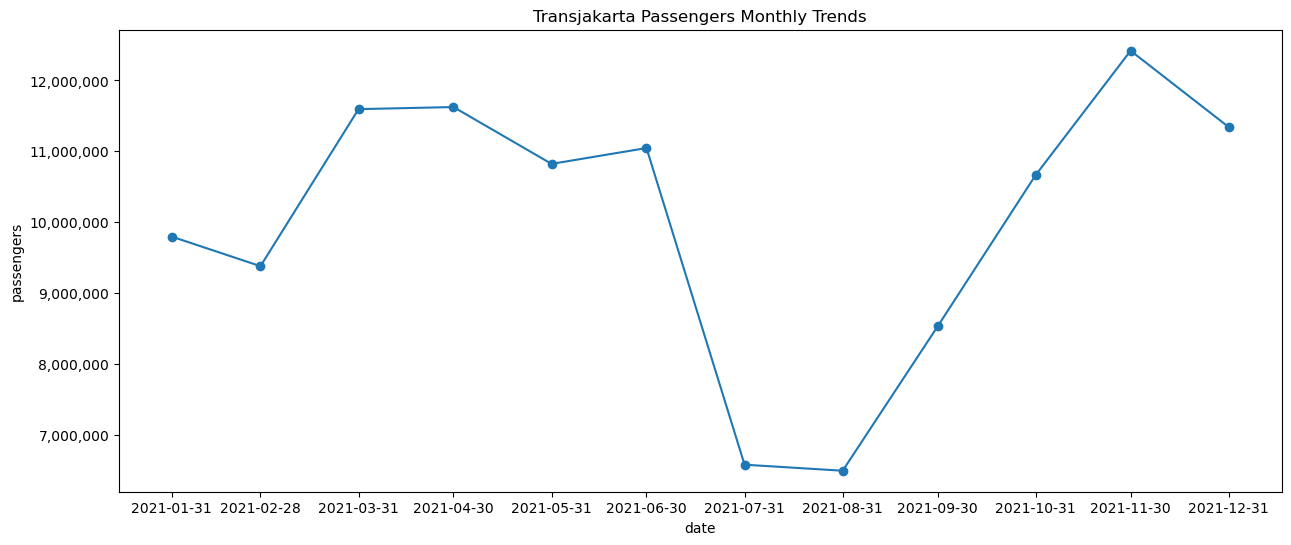

In [4397]:
# Create the line plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(passengers_trends.index, passengers_trends['passengers'], marker='o', linestyle='-')

# Format y-axis labels with thousands separator
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Transjakarta Passengers Monthly Trends')

plt.xlabel('date')
plt.ylabel('passengers')

plt.xticks(ticks = passengers_trends.index);


Insights:
- The Transjakarta monthly passenger trends in 2021 exhibited sideways movements with relatively high volatility.

- Starting from June, there was a notable decrease in passenger numbers, which can be attributed to the government's implementation of COVID-19 social distancing measures.

- However, from August onwards, there was a steady and continuous increase in passenger numbers, leading to a peak in November.

### **3.2 Passenger Distribution by Mode of Transport**

/var/folders/yj/b9f3mv7j0bq585tjqs9_xgb00000gn/T/ipykernel_995/3572359903.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])


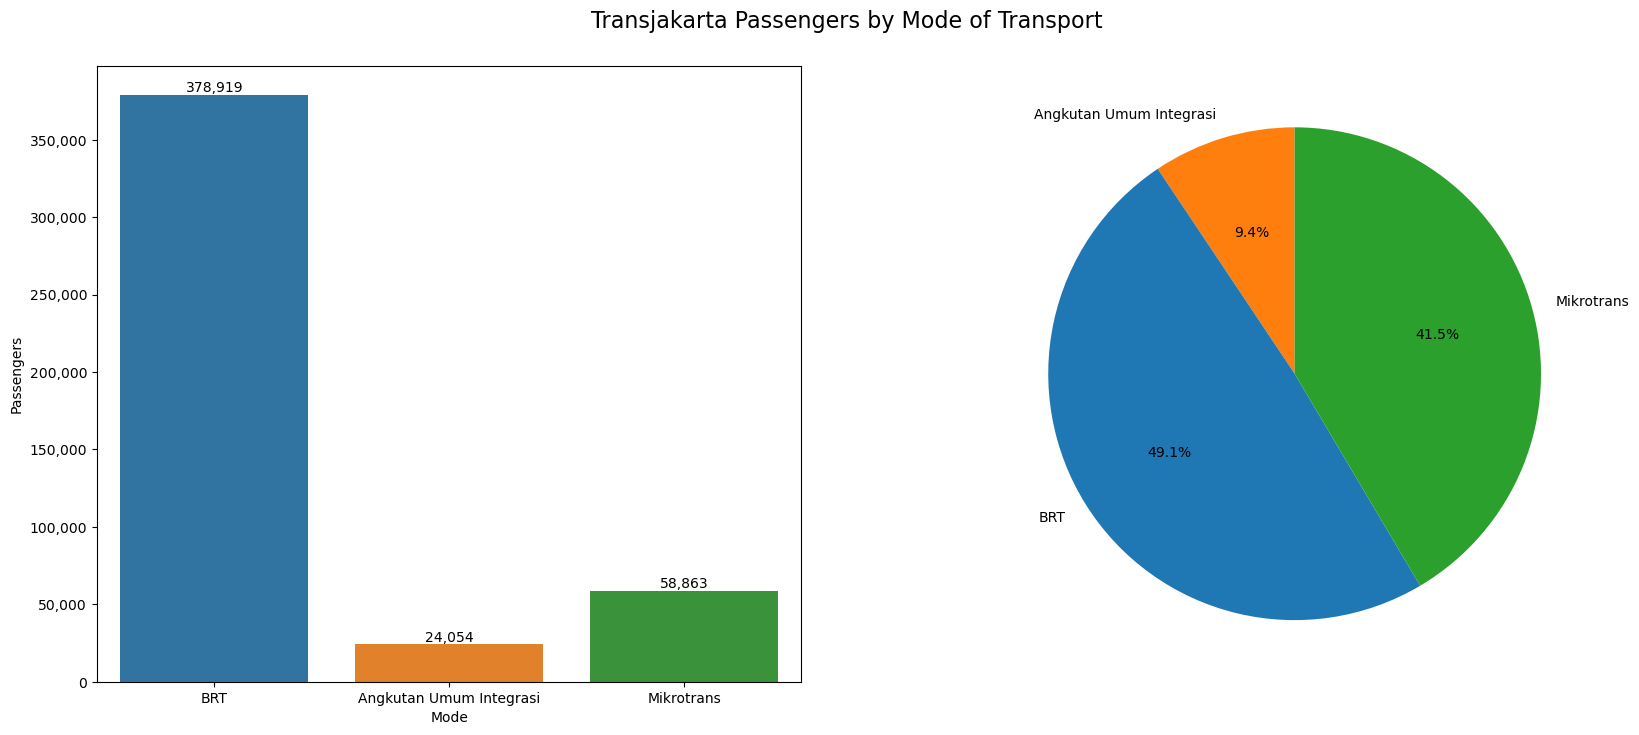

In [4398]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 8))

# BAR PLOT
# Create the bar plot
plt.subplot(1, 2, 1)
ax = sns.barplot(
    data=df_passengers,
    x='mode',
    y='passengers',
    errorbar=('ci', False)
)

# Set the desired colors for each mode
colors = {'BRT': 'tab:blue', 'Angkutan Umum Integrasi': 'tab:orange', 'Mikrotrans': 'tab:green'}

# Set the palette using the desired colors
sns.set_palette(colors.values())

# Format y-axis labels with thousand separators
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])

# Add value annotations
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:,.0f}'.format(height), (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

# Set the plot title and labels
ax.set_xlabel('Mode')
ax.set_ylabel('Passengers')

# PIE PLOT
# Grouping the data by 'mode' and summing the 'passengers' column
grouped_data = df_passengers.groupby('mode')['passengers'].sum().reset_index()

# Plotting the pie chart using matplotlib
plt.subplot(1, 2, 2)
plt.pie(grouped_data['passengers'], labels=grouped_data['mode'], autopct='%1.1f%%', startangle=90, colors=[colors[m] for m in grouped_data['mode']])

# Add a big centered title for the whole plot
plt.suptitle('Transjakarta Passengers by Mode of Transport', fontsize=16, y=0.95)

# Display the plot
plt.show()

Insights:

1. BRT is the most popular mode, carrying almost the half proportion of passengers.

2. Mikrotrans is also popular, indicating demand for smaller transport options.

3. There is potential to improve and expand Mikrotrans to meet demand.

### **3.3 BRT Monthly Trends**

In [4399]:
df_passengers

,date,mode,route_id,route,origin,destination,passengers
572,2021-01-31,BRT,1,Blok M - Kota,Blok M,Kota,773717
571,2021-01-31,BRT,10,Tanjung Priok - PGC 2,Tanjung Priok,PGC 2,356211
609,2021-01-31,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,Tanjung Priok,Senen via Taman BMW,41881
570,2021-01-31,BRT,11,Pulo Gebang - Matraman,Pulo Gebang,Matraman,134632
608,2021-01-31,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Pulo Gebang,Pulo Gadung 2 via PIK,61434
...,...,...,...,...,...,...,...
739,2021-12-31,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,Tanjung Priok,Jembatan Item,77697
738,2021-12-31,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,Rawa Buaya,Rawa Kompeni,70475
737,2021-12-31,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,Terminal Kampung Melayu,Kapin Raya,59193
736,2021-12-31,Mikrotrans,JAK.85,Bintara - Cipinang Indah,Bintara,Cipinang Indah,40103


In [4400]:
df_passengers.groupby('mode')['passengers'].sum()

mode
Angkutan Umum Integrasi    11281390
BRT                        59111356
Mikrotrans                 49915801
Name: passengers, dtype: int64

In [4401]:
df_brt = df_passengers[df_passengers['mode'] == 'BRT']
df_brt

,date,mode,route_id,route,origin,destination,passengers
572,2021-01-31,BRT,1,Blok M - Kota,Blok M,Kota,773717
571,2021-01-31,BRT,10,Tanjung Priok - PGC 2,Tanjung Priok,PGC 2,356211
570,2021-01-31,BRT,11,Pulo Gebang - Matraman,Pulo Gebang,Matraman,134632
569,2021-01-31,BRT,12,Tanjung Priok - Pluit,Tanjung Priok,Pluit,137793
568,2021-01-31,BRT,13,Ciledug - Tendean,Ciledug,Tendean,266290
...,...,...,...,...,...,...,...
811,2021-12-31,BRT,5,Matraman Baru - Ancol,Matraman Baru,Ancol,513138
810,2021-12-31,BRT,6,Ragunan - Dukuh Atas 2,Ragunan,Dukuh Atas 2,401232
809,2021-12-31,BRT,7,Kampung Rambutan - Bidara Cina,Kampung Rambutan,Bidara Cina,402368
808,2021-12-31,BRT,8,Lebak Bulus - Pasar Baru,Lebak Bulus,Pasar Baru,533221


In [4402]:
# Change route_id datatype to int
df_brt['route_id'] = df_brt['route_id'].astype(int)
df_brt

/var/folders/yj/b9f3mv7j0bq585tjqs9_xgb00000gn/T/ipykernel_995/2091777351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brt['route_id'] = df_brt['route_id'].astype(int)


,date,mode,route_id,route,origin,destination,passengers
572,2021-01-31,BRT,1,Blok M - Kota,Blok M,Kota,773717
571,2021-01-31,BRT,10,Tanjung Priok - PGC 2,Tanjung Priok,PGC 2,356211
570,2021-01-31,BRT,11,Pulo Gebang - Matraman,Pulo Gebang,Matraman,134632
569,2021-01-31,BRT,12,Tanjung Priok - Pluit,Tanjung Priok,Pluit,137793
568,2021-01-31,BRT,13,Ciledug - Tendean,Ciledug,Tendean,266290
...,...,...,...,...,...,...,...
811,2021-12-31,BRT,5,Matraman Baru - Ancol,Matraman Baru,Ancol,513138
810,2021-12-31,BRT,6,Ragunan - Dukuh Atas 2,Ragunan,Dukuh Atas 2,401232
809,2021-12-31,BRT,7,Kampung Rambutan - Bidara Cina,Kampung Rambutan,Bidara Cina,402368
808,2021-12-31,BRT,8,Lebak Bulus - Pasar Baru,Lebak Bulus,Pasar Baru,533221


In [4403]:
# Assign color palette for each corridor
color_dict = {
    1: '#D22228',
    2: '#264797',
    3: '#FCC81B',
    4: '#562B63',
    5: '#BB5727',
    6: '#2EA449',
    7: '#E1285B',
    8: '#C8328C',
    9: '#3E9594',
    10: '#8E191D',
    11: '#2F4FA2',
    12: '#5FB768',
    13: '#5B369D'
}
df_brt['route_color'] = df_brt['route_id'].map(color_dict)

/var/folders/yj/b9f3mv7j0bq585tjqs9_xgb00000gn/T/ipykernel_995/171415784.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brt['route_color'] = df_brt['route_id'].map(color_dict)


In [4404]:
# Sort values df_brt
df_brt = df_brt.sort_values(by = ['date', 'route_id'])

df_brt.head()

,date,mode,route_id,route,origin,destination,passengers,route_color
572,2021-01-31,BRT,1,Blok M - Kota,Blok M,Kota,773717,#D22228
567,2021-01-31,BRT,2,Pulo Gadung - Monas,Pulo Gadung,Monas,323751,#264797
566,2021-01-31,BRT,3,Kalideres - Monas via Veteran,Kalideres,Monas via Veteran,444971,#FCC81B
565,2021-01-31,BRT,4,Pulo Gadung 2 - Dukuh Atas 2,Pulo Gadung 2,Dukuh Atas 2,249575,#562B63
564,2021-01-31,BRT,5,Matraman Baru - Ancol,Matraman Baru,Ancol,400573,#BB5727


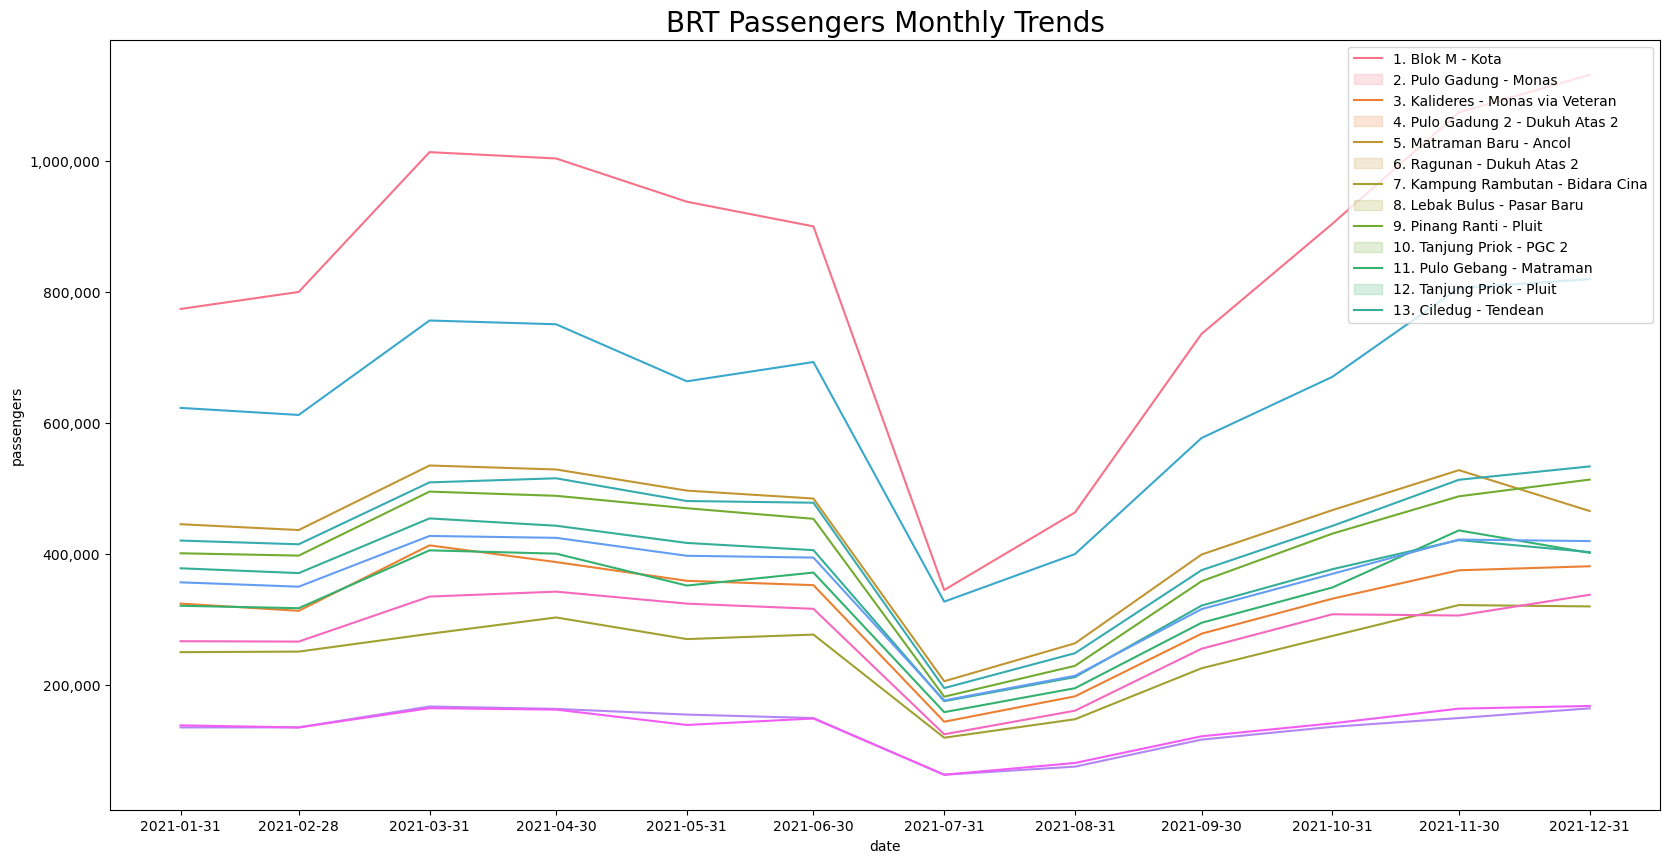

In [4405]:
plt.figure(figsize=(20, 10))

sns.lineplot(data=df_brt, x='date', y='passengers', hue=df_brt['route_color'], palette=None)

plt.title('BRT Passengers Monthly Trends', size=20)
plt.xticks(ticks=df_brt['date'].unique())

# Set the y-axis with thousands separator
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Get the current legend labels
legend_labels = [f'{route_id}. {route}' for route_id, route in zip(df_brt['route_id'].unique(), df_brt['route'])]

# Move the legends to the upper-right side
plt.legend(legend_labels, loc='upper right')

plt.show()

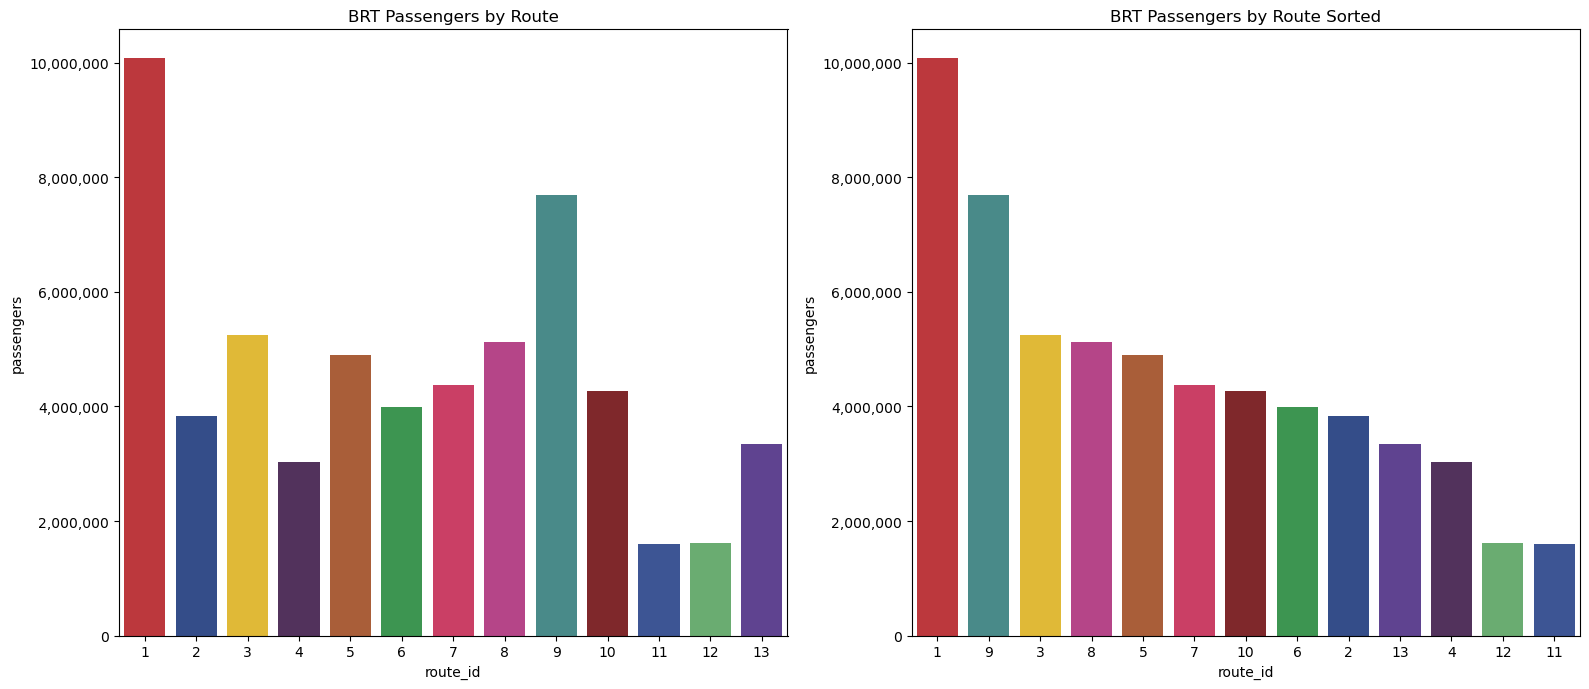

In [4406]:
plt.figure(figsize=(16, 7))

# Chart 1
plt.subplot(1, 2, 1)
sns.barplot(data=df_brt, x='route_id', y='passengers', estimator='sum', palette=df_brt['route_color'].unique() , errorbar=None)

plt.title('BRT Passengers by Route')

# Format y-axis tick labels with thousands separator
ax1 = plt.gca()
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


# Chart 2
plt.subplot(1, 2, 2)

# Sort the DataFrame in descending order based on 'passengers' column
df_sorted = df_brt.groupby(by='route_id')[['passengers']].sum().reset_index().sort_values('passengers', ascending=False)

# Create a list of route IDs in the sorted order
order = df_sorted['route_id']

sns.barplot(data=df_brt, x='route_id', y='passengers', estimator='sum', palette=df_sorted['route_id'].map(color_dict), errorbar=None, order=order)

plt.title('BRT Passengers by Route Sorted')

# Format y-axis tick labels with thousands separator
ax2 = plt.gca()
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()  # Adjust spacing between subplots

plt.show()

**Insights:**

1. BRT Corridor 1 emerges as the most widely utilized route of Transjakarta, experiencing the highest passenger demand. It is followed by Corridor 9 and Corridor 3, which also demonstrate significant usage.

2. Corridor 11 stands out as the least utilized Transjakarta route among the various corridors, exhibiting comparatively lower passenger volumes when compared to other routes.

These insights highlight the varying levels of route usage within the Transjakarta system, with BRT Corridor 1 serving as the primary choice for commuters. The data emphasizes the need for further analysis to understand the factors contributing to the popularity of certain routes 

---

## **4. CORRIDOR 1 PASSENGERS ANALYSIS**

In [4407]:
# Reset pivot table index to make it easier to merge
pt_passengers_res_ind = pt_passengers.reset_index()
pt_passengers_res_ind.head()

date,route_id,route,mode,origin,destination,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-31 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-31 00:00:00,2021-11-30 00:00:00,2021-12-31 00:00:00
0,1,Blok M - Kota,BRT,Blok M,Kota,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,903783.0,1073929.0,1131439.0
1,10,Tanjung Priok - PGC 2,BRT,Tanjung Priok,PGC 2,356211.0,349572.0,427032.0,424169.0,396760.0,393998.0,175900.0,213453.0,315308.0,369184.0,421487.0,419198.0
2,10K,Tanjung Priok - Senen via Taman BMW,Angkutan Umum Integrasi,Tanjung Priok,Senen via Taman BMW,41881.0,31243.0,36891.0,34736.0,31667.0,32798.0,23069.0,29478.0,32614.0,34615.0,34498.0,0.0
3,11,Pulo Gebang - Matraman,BRT,Pulo Gebang,Matraman,134632.0,134665.0,166555.0,162931.0,154256.0,148933.0,62391.0,74753.0,116020.0,135543.0,148930.0,163776.0
4,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Angkutan Umum Integrasi,Pulo Gebang,Pulo Gadung 2 via PIK,61434.0,47628.0,58186.0,55677.0,51102.0,50089.0,33801.0,40578.0,48895.0,54197.0,59155.0,0.0


In [4408]:
# Merge passengers pivot table with df_trips and the merge with df_frequencies to get trip frequencies
df_merged = pt_passengers_res_ind.merge(df_trips).merge(df_frequencies)
df_merged.head()

,route_id,route,mode,origin,destination,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,...,2021-11-30 00:00:00,2021-12-31 00:00:00,service_id,trip_id,trip_headsign,direction_id,shape_id,start_time,end_time,headway_secs
0,1,Blok M - Kota,BRT,Blok M,Kota,773717.0,799708.0,1013221.0,1003534.0,937452.0,...,1073929.0,1131439.0,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:00:00,06:00:00,180
1,1,Blok M - Kota,BRT,Blok M,Kota,773717.0,799708.0,1013221.0,1003534.0,937452.0,...,1073929.0,1131439.0,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,06:00:00,09:00:00,90
2,1,Blok M - Kota,BRT,Blok M,Kota,773717.0,799708.0,1013221.0,1003534.0,937452.0,...,1073929.0,1131439.0,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,09:00:00,16:00:00,180
3,1,Blok M - Kota,BRT,Blok M,Kota,773717.0,799708.0,1013221.0,1003534.0,937452.0,...,1073929.0,1131439.0,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,16:00:00,20:00:00,90
4,1,Blok M - Kota,BRT,Blok M,Kota,773717.0,799708.0,1013221.0,1003534.0,937452.0,...,1073929.0,1131439.0,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,20:00:00,22:00:00,180


In [4409]:
# Obtain Corridor 1 frequencies
df_corridor_1 = df_merged[(df_merged.route_id == '1')]
df_corridor_1.head()

,route_id,route,mode,origin,destination,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,...,2021-11-30 00:00:00,2021-12-31 00:00:00,service_id,trip_id,trip_headsign,direction_id,shape_id,start_time,end_time,headway_secs
0,1,Blok M - Kota,BRT,Blok M,Kota,773717.0,799708.0,1013221.0,1003534.0,937452.0,...,1073929.0,1131439.0,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:00:00,06:00:00,180
1,1,Blok M - Kota,BRT,Blok M,Kota,773717.0,799708.0,1013221.0,1003534.0,937452.0,...,1073929.0,1131439.0,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,06:00:00,09:00:00,90
2,1,Blok M - Kota,BRT,Blok M,Kota,773717.0,799708.0,1013221.0,1003534.0,937452.0,...,1073929.0,1131439.0,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,09:00:00,16:00:00,180
3,1,Blok M - Kota,BRT,Blok M,Kota,773717.0,799708.0,1013221.0,1003534.0,937452.0,...,1073929.0,1131439.0,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,16:00:00,20:00:00,90
4,1,Blok M - Kota,BRT,Blok M,Kota,773717.0,799708.0,1013221.0,1003534.0,937452.0,...,1073929.0,1131439.0,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,20:00:00,22:00:00,180


In [4410]:
# Corridor 1 Frequencies
df_corridor_1_freq = df_corridor_1.iloc[:,-4:]
df_corridor_1_freq

,shape_id,start_time,end_time,headway_secs
0,1-R05_shp,05:00:00,06:00:00,180
1,1-R05_shp,06:00:00,09:00:00,90
2,1-R05_shp,09:00:00,16:00:00,180
3,1-R05_shp,16:00:00,20:00:00,90
4,1-R05_shp,20:00:00,22:00:00,180


In [4411]:
# Calculate total trips for Corridor 1 in a day
# =============================================

# Convert start_time and end_time columns to datetime objects
df_corridor_1_freq['start_time'] = pd.to_datetime(df_corridor_1_freq['start_time'], format='%H:%M:%S')
df_corridor_1_freq['end_time'] = pd.to_datetime(df_corridor_1_freq['end_time'], format='%H:%M:%S')

# Create a list to store the time schedule
time_schedule = []

# Generate the complete time schedule
for index, row in df_corridor_1_freq.iterrows():
    start_time = row['start_time']
    end_time = row['end_time']
    headway_secs = row['headway_secs']
    
    current_time = start_time
    while current_time < end_time:
        time_schedule.append(current_time)
        current_time += pd.Timedelta(seconds=headway_secs)

# Create a DataFrame from the time schedule
df_time_schedule = pd.DataFrame({'time': time_schedule})

# Format 'time' column to show only time as a string
df_time_schedule['time'] = df_time_schedule['time'].dt.strftime('%H:%M:%S')

# Corridor 1 total trips in a day
corridor_1_tot_trips = len(df_time_schedule)
corridor_1_tot_trips

480

In [4412]:
df_time_schedule

,time
0,05:00:00
1,05:03:00
2,05:06:00
3,05:09:00
4,05:12:00
...,...
475,21:45:00
476,21:48:00
477,21:51:00
478,21:54:00


Insights:
- Corridor 1 has 480 trips in one day.

In [4413]:
# Corridor 1 monthly passengers
list_corridor_1_passengers = list(df_corridor_1.describe().iloc[1,0:12])
list_corridor_1_passengers

[773717.0,
 799708.0,
 1013221.0,
 1003534.0,
 937452.0,
 899829.0,
 344528.0,
 462959.0,
 735653.0,
 903783.0,
 1073929.0,
 1131439.0]

In [4414]:
list_day = list(df_passengers['date'].drop_duplicates().dt.day)
list_day

[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

In [4415]:
total_trips = corridor_1_tot_trips
bus_capacity = 60
list_crowdedness = []


for index, total_passengers in enumerate(list_corridor_1_passengers):
    # Calculate the total capacity of the bus for all trips
    total_capacity = bus_capacity * total_trips * list_day[index]

    # Calculate the maximum number of passengers that can be accommodated for all trips
    max_passengers = total_capacity

    # Calculate the crowdedness
    crowdedness = total_passengers / max_passengers
    list_crowdedness.append(crowdedness)

In [4416]:
list_crowdedness

[0.8666185035842294,
 0.9917013888888889,
 1.1348801523297491,
 1.1614976851851853,
 1.050013440860215,
 1.04146875,
 0.38589605734767024,
 0.5185472670250896,
 0.8514502314814815,
 1.0123017473118279,
 1.2429733796296296,
 1.2672927867383512]

In [4417]:
df_corridor_1_crowd = df_passengers[df_passengers.route_id == '1'][['date', 'passengers']].set_index('date')
df_corridor_1_crowd['crowdedness'] = list_crowdedness
df_corridor_1_crowd['crowdedness'] = df_corridor_1_crowd['crowdedness'].round(2)
df_corridor_1_crowd

,passengers,crowdedness
date,,
2021-01-31,773717,0.87
2021-02-28,799708,0.99
2021-03-31,1013221,1.13
2021-04-30,1003534,1.16
2021-05-31,937452,1.05
2021-06-30,899829,1.04
2021-07-31,344528,0.39
2021-08-31,462959,0.52
2021-09-30,735653,0.85


In [4418]:
df_corridor_1_crowd.to_csv('crowdedness rate.csv')

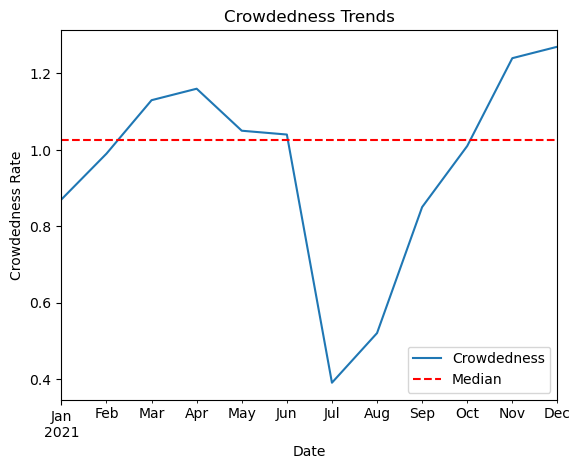

In [4419]:
df_corridor_1_crowd.crowdedness.plot()

crowdedness_med = np.median(df_corridor_1_crowd.crowdedness)
plt.axhline(y=crowdedness_med, color='red', linestyle='--')

plt.title('Crowdedness Trends')
plt.ylabel('Crowdedness Rate')
plt.xlabel('Date')

# Create legend in the top right corner
plt.legend(['Crowdedness', 'Median'], loc='lower right')

plt.show()


**Insights:**

- The median crowdedness rate in corridor 1 exceeds 100%, indicating that there is an excessive number of passengers compared to the capacity provided.

- This suggests that the corridor is experiencing overcrowding. Addressing this issue becomes crucial to ensure a smooth and efficient transportation experience for passengers and to maintain the overall quality of service.

---

# **Analysis of the High Crowding in Corridor 1**

In [4420]:
# Obtain unique BRT route_id and its respective route
df_brt_route = df_brt[['route_id', 'route']].drop_duplicates().reset_index()[['route_id', 'route']]
df_brt_route['route_id'] = df_brt_route['route_id'].astype(str)
df_brt_route

,route_id,route
0,1,Blok M - Kota
1,2,Pulo Gadung - Monas
2,3,Kalideres - Monas via Veteran
3,4,Pulo Gadung 2 - Dukuh Atas 2
4,5,Matraman Baru - Ancol
5,6,Ragunan - Dukuh Atas 2
6,7,Kampung Rambutan - Bidara Cina
7,8,Lebak Bulus - Pasar Baru
8,9,Pinang Ranti - Pluit
9,10,Tanjung Priok - PGC 2


In [4421]:
df_trips

,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id
0,1,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp
2,10,SH,10-R01,Tanjung Priok - PGC 2,0,10-R01_shp
4,10A,SH,10A-R01,Rusun Marunda - Tanjung Priok,0,10A-R01_shp
6,10B,SH,10B-R01,Rusun Cipinang Besar Selatan - Penas Kalimalang,0,10B-R01_shp
10,10H,SH,10H-R03,Tanjung Priok - Blok M,0,10H-R03_shp
...,...,...,...,...,...,...
444,M9,SH,M9-R01,Pinang Ranti - Pluit,0,M9-R01_shp
446,R1A,SH,R1A-R01,Pantai Maju - Kota,0,R1A-R01_shp
448,S11,SH,S11-R03,BSD - Jelambar,0,S11-R03_shp
452,S21,SH,S21-R03,Ciputat - Kejaksaan Agung,0,S21-R03_shp


In [4422]:
# Merge df_brt_route with df_trips
df_merged = df_brt_route.merge(df_trips)
df_merged

,route_id,route,service_id,trip_id,trip_headsign,direction_id,shape_id
0,1,Blok M - Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp
1,2,Pulo Gadung - Monas,SH,2-R03,Pulo Gadung - Monas,0,f3px
2,3,Kalideres - Monas via Veteran,HR,3-R05,Kalideres - Monas,0,z4hg
3,4,Pulo Gadung 2 - Dukuh Atas 2,HR,4-R10,Pulo Gadung 2 - Dukuh Atas 2,0,qhy5
4,5,Matraman Baru - Ancol,SH,5-R03,Matraman - Ancol,0,5-R03_shp
5,6,Ragunan - Dukuh Atas 2,SH,6-R03,Ragunan - Dukuh Atas 2,0,f8tv
6,7,Kampung Rambutan - Bidara Cina,SH,7-R03,Kampung Rambutan - Bidara Cina,0,7-R03_shp
7,8,Lebak Bulus - Pasar Baru,SH,8-R03,Lebak Bulus - Pasar Baru,0,8-R03_shp
8,9,Pinang Ranti - Pluit,SH,9-R01,Pinang Ranti - Pluit,0,9-R01_shp
9,10,Tanjung Priok - PGC 2,SH,10-R01,Tanjung Priok - PGC 2,0,10-R01_shp


In [4423]:
# Merge it again with df_shapes to obtain route's shapes for each BRT corridor
df_brt_route = df_merged.merge(df_shapes)
df_brt_route

,route_id,route,service_id,trip_id,trip_headsign,direction_id,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,1,Blok M - Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,-6.243371,106.801755,0
1,1,Blok M - Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,-6.243370,106.802133,1
2,1,Blok M - Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,-6.243364,106.802276,2
3,1,Blok M - Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,-6.243315,106.802376,3
4,1,Blok M - Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,-6.243195,106.802428,4
...,...,...,...,...,...,...,...,...,...,...
3070,13,Ciledug - Tendean,SH,13-R01,CBD Ciledug - Tendean,0,13-R01_shp,-6.240019,106.831565,318
3071,13,Ciledug - Tendean,SH,13-R01,CBD Ciledug - Tendean,0,13-R01_shp,-6.240056,106.831546,319
3072,13,Ciledug - Tendean,SH,13-R01,CBD Ciledug - Tendean,0,13-R01_shp,-6.240135,106.831422,320
3073,13,Ciledug - Tendean,SH,13-R01,CBD Ciledug - Tendean,0,13-R01_shp,-6.240200,106.831252,321


In [4424]:
df_brt_route.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3075 entries, 0 to 3074
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   route_id           3075 non-null   object 
 1   route              3075 non-null   object 
 2   service_id         3075 non-null   object 
 3   trip_id            3075 non-null   object 
 4   trip_headsign      3075 non-null   object 
 5   direction_id       3075 non-null   int64  
 6   shape_id           3075 non-null   object 
 7   shape_pt_lat       3075 non-null   float64
 8   shape_pt_lon       3075 non-null   float64
 9   shape_pt_sequence  3075 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 264.3+ KB


In [4425]:
# Obtain necessary columns
df_brt_route = df_brt_route[['route_id', 'route', 'shape_pt_lat', 'shape_pt_lon', 'shape_pt_sequence']]
df_brt_route.head()

,route_id,route,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,1,Blok M - Kota,-6.243371,106.801755,0
1,1,Blok M - Kota,-6.243370,106.802133,1
2,1,Blok M - Kota,-6.243364,106.802276,2
3,1,Blok M - Kota,-6.243315,106.802376,3
4,1,Blok M - Kota,-6.243195,106.802428,4


In [4426]:
df_brt_route.route_id.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13'], dtype=object)

In [4427]:
# CREATE a dictionary consists of df_brt_route with the route_id as the keys
# List of unique route_id values
unique_route_ids = df_brt_route['route_id'].unique()

# Dictionary to store the DataFrames
dfs = {}

# Loop over the unique route_id values
for route_id in unique_route_ids:
    # Create the DataFrame for the current route_id
    df = df_brt_route[df_brt_route['route_id'] == route_id]
    
    # Add the DataFrame to the dictionary with route_id as the key
    dfs[route_id] = df

In [4428]:
dfs

{'1':     route_id          route  shape_pt_lat  shape_pt_lon  shape_pt_sequence
 0          1  Blok M - Kota     -6.243371    106.801755                  0
 1          1  Blok M - Kota     -6.243370    106.802133                  1
 2          1  Blok M - Kota     -6.243364    106.802276                  2
 3          1  Blok M - Kota     -6.243315    106.802376                  3
 4          1  Blok M - Kota     -6.243195    106.802428                  4
 ..       ...            ...           ...           ...                ...
 117        1  Blok M - Kota     -6.146680    106.816070                117
 118        1  Blok M - Kota     -6.144500    106.815450                118
 119        1  Blok M - Kota     -6.136549    106.813197                119
 120        1  Blok M - Kota     -6.136915    106.811813                120
 121        1  Blok M - Kota     -6.135366    106.811378                121
 
 [122 rows x 5 columns],
 '2':     route_id                route  shape_pt_lat  s

In [4429]:
df_brt_route_marker = df_brt_route[df_brt_route['shape_pt_sequence'] == 0]
df_brt_route_marker

,route_id,route,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,1,Blok M - Kota,-6.243371,106.801755,0
122,2,Pulo Gadung - Monas,-6.183239,106.909070,0
359,3,Kalideres - Monas via Veteran,-6.154401,106.705458,0
560,4,Pulo Gadung 2 - Dukuh Atas 2,-6.183104,106.908693,0
670,5,Matraman Baru - Ancol,-6.212789,106.861103,0
753,6,Ragunan - Dukuh Atas 2,-6.305781,106.819477,0
965,7,Kampung Rambutan - Bidara Cina,-6.309881,106.882119,0
1106,8,Lebak Bulus - Pasar Baru,-6.289340,106.774150,0
1460,9,Pinang Ranti - Pluit,-6.291108,106.886273,0
1917,10,Tanjung Priok - PGC 2,-6.109488,106.882143,0


In [4430]:
df_density = pd.read_csv('data-jumlah-kepadatan-penduduk-per-kelurahan-tahun-2020.csv')
df_density = df_density.iloc[:,:-2]
df_density.head()

,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah_luas_wilayah_(km2),jumlah_kepadatan_(jiwa/km2)
0,2020,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0.62,11442.834140
1,2020,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,2.58,2774.403219
2,2020,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,2.45,1082.052958
3,2020,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,1.03,2476.421974
4,2020,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,1.07,5685.687558


In [4431]:
df_density['jumlah_penduduk'] = (df_density['jumlah_luas_wilayah_(km2)'] * df_density['jumlah_kepadatan_(jiwa/km2)'].round(0)).apply(np.floor).astype(int)
df_density.head()

,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah_luas_wilayah_(km2),jumlah_kepadatan_(jiwa/km2),jumlah_penduduk
0,2020,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0.62,11442.834140,7094
1,2020,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,2.58,2774.403219,7156
2,2020,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,2.45,1082.052958,2650
3,2020,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,1.03,2476.421974,2550
4,2020,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,1.07,5685.687558,6084


In [4432]:
df_density = df_density.groupby('nama_kelurahan')[['jumlah_penduduk']].sum().reset_index()
df_density

,nama_kelurahan,jumlah_penduduk
0,ANCOL,30107
1,ANGKE,36387
2,BALE KAMBANG,36694
3,BALI MESTER,11568
4,BAMBU APUS,32939
...,...,...
262,UTAN KAYU SELATAN,41305
263,UTAN KAYU UTARA,34816
264,UTAN PANJANG,37930
265,WARAKAS,56827


In [4433]:
df_density['nama_kelurahan'].unique()

array(['ANCOL', 'ANGKE', 'BALE KAMBANG', 'BALI MESTER', 'BAMBU APUS',
       'BANGKA', 'BARU', 'BATU AMPAR', 'BENDUNGAN HILIR', 'BIDARA CINA',
       'BINTARO', 'BUKIT DURI', 'BUNGUR', 'CAKUNG BARAT', 'CAKUNG TIMUR',
       'CAWANG', 'CEGER', 'CEMPAKA BARU', 'CEMPAKA PUTIH BARAT',
       'CEMPAKA PUTIH TIMUR', 'CENGKARENG BARAT', 'CENGKARENG TIMUR',
       'CIBUBUR', 'CIDENG', 'CIGANJUR', 'CIJANTUNG', 'CIKINI', 'CIKOKO',
       'CILANDAK BARAT', 'CILANDAK TIMUR', 'CILANGKAP', 'CILILITAN',
       'CILINCING', 'CIPAYUNG', 'CIPEDAK', 'CIPETE SELATAN',
       'CIPETE UTARA', 'CIPINANG', 'CIPINANG BESAR SELATAN',
       'CIPINANG BESAR UTARA', 'CIPINANG CEMPEDAK', 'CIPINANG MELAYU',
       'CIPINANG MUARA', 'CIPULIR', 'CIRACAS', 'DUKUH', 'DUREN SAWIT',
       'DUREN TIGA', 'DURI KEPA', 'DURI KOSAMBI', 'DURI PULO',
       'DURI SELATAN', 'DURI UTARA', 'GALUR', 'GAMBIR',
       'GANDARIA SELATAN', 'GANDARIA UTARA', 'GEDONG', 'GELORA', 'GLODOK',
       'GONDANGDIA', 'GROGOL', 'GROGOL SELATAN',

In [4434]:
# menyamakan nama kelurahan di df agar sama dengan yg di geojson
df_density['nama_kelurahan'] = df_density['nama_kelurahan'].replace('PULO GADUNG', 'PULOGADUNG')
df_density['nama_kelurahan'] = df_density['nama_kelurahan'].replace('WIJAYA KUSUMA', 'WIJAYA KESUMA')
df_density['nama_kelurahan'] = df_density['nama_kelurahan'].replace('JATI PADANG', 'JATIPADANG')
df_density['nama_kelurahan'] = df_density['nama_kelurahan'].replace('SETIA BUDI', 'SETIABUDI')
df_density['nama_kelurahan'] = df_density['nama_kelurahan'].replace('KERENDANG', 'KRENDANG')
df_density['nama_kelurahan'] = df_density['nama_kelurahan'].replace('RAWA JATI', 'RAWAJATI')
df_density['nama_kelurahan'] = df_density['nama_kelurahan'].replace('PONDOK RANGGON', 'PONDOK RANGON')
df_density['nama_kelurahan'] = df_density['nama_kelurahan'].replace('KALI BARU', 'KALIBARU')

In [4435]:
df_density.to_csv('data-jumlah-kepadatan-penduduk-per-kelurahan-tahun-2020-clean.csv')

In [4436]:
bins = df_density['jumlah_penduduk'].quantile([0, 0.25, 0.50, 0.75, 1])
bins

0.00      2550.0
0.25     25380.5
0.50     37784.0
0.75     52805.5
1.00    171715.0
Name: jumlah_penduduk, dtype: float64

In [4437]:
# Define the contrasting colors for each route
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#FF8000', '#008000', '#800080', '#FFC0CB', '#800000', '#008080', '#808000']
df_brt_route_marker['color'] = colors
df_brt_route_marker

/var/folders/yj/b9f3mv7j0bq585tjqs9_xgb00000gn/T/ipykernel_995/1691599256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brt_route_marker['color'] = colors


,route_id,route,shape_pt_lat,shape_pt_lon,shape_pt_sequence,color
0,1,Blok M - Kota,-6.243371,106.801755,0,#FF0000
122,2,Pulo Gadung - Monas,-6.183239,106.909070,0,#00FF00
359,3,Kalideres - Monas via Veteran,-6.154401,106.705458,0,#0000FF
560,4,Pulo Gadung 2 - Dukuh Atas 2,-6.183104,106.908693,0,#FFFF00
670,5,Matraman Baru - Ancol,-6.212789,106.861103,0,#00FFFF
753,6,Ragunan - Dukuh Atas 2,-6.305781,106.819477,0,#FF00FF
965,7,Kampung Rambutan - Bidara Cina,-6.309881,106.882119,0,#FF8000
1106,8,Lebak Bulus - Pasar Baru,-6.289340,106.774150,0,#008000
1460,9,Pinang Ranti - Pluit,-6.291108,106.886273,0,#800080
1917,10,Tanjung Priok - PGC 2,-6.109488,106.882143,0,#FFC0CB


In [4438]:
df_brt_route_marker

,route_id,route,shape_pt_lat,shape_pt_lon,shape_pt_sequence,color
0,1,Blok M - Kota,-6.243371,106.801755,0,#FF0000
122,2,Pulo Gadung - Monas,-6.183239,106.909070,0,#00FF00
359,3,Kalideres - Monas via Veteran,-6.154401,106.705458,0,#0000FF
560,4,Pulo Gadung 2 - Dukuh Atas 2,-6.183104,106.908693,0,#FFFF00
670,5,Matraman Baru - Ancol,-6.212789,106.861103,0,#00FFFF
753,6,Ragunan - Dukuh Atas 2,-6.305781,106.819477,0,#FF00FF
965,7,Kampung Rambutan - Bidara Cina,-6.309881,106.882119,0,#FF8000
1106,8,Lebak Bulus - Pasar Baru,-6.289340,106.774150,0,#008000
1460,9,Pinang Ranti - Pluit,-6.291108,106.886273,0,#800080
1917,10,Tanjung Priok - PGC 2,-6.109488,106.882143,0,#FFC0CB


In [4439]:
# Load the Jakarta geojson file
jakarta_geojson = r'jakarta_by_kelurahan_geo.geojson'

#  buat peta jakarta
jakarta_map = folium.Map(location=[-6.172747091993429, 106.82780138617697], zoom_start=12, tiles='CartoDB Positron')

# choropleth
chor_kelurahan = folium.Choropleth(
    geo_data = r'jakarta_by_kelurahan_geo.geojson',  # file geojson (data geospatial)
    data = df_density,
    columns = ['nama_kelurahan', 'jumlah_penduduk'],  # kolom yang dipakai
    key_on = 'feature.properties.name',               # indexing nama kelurahan dlm file geojson
    bins = bins_jumlah,
    # fill_color= 'YlOrRd',                           # warna polygon
    fill_opacity= 0.5,                              # transparency polygon
    line_opacity= 0.2                               # transparency garis luar polygon
)

# memasukkan choropleth ke map
chor_kelurahan.add_to(jakarta_map)

# Add a GeoJson layer for the block labels
labels_layer = folium.GeoJson(
    jakarta_geojson,
    name='labels',
    style_function=lambda feature: {
        'color': 'transparent',
        'fillColor': 'transparent',
        'weight': 0,
        'opacity': 0,
        'fillOpacity': 0,
        'text': feature['properties']['name'],  # Get the name of the block as the label text
        'text_font': 'Arial',  # Set the font family for the label text
        'text_size': 10,  # Set the font size for the label text
        'text_anchor': 'middle',  # Set the text anchor to the middle of the label
    },
    highlight_function=lambda x: {'weight': 1, 'color': 'black'},  # Add a highlight effect on mouseover
    tooltip=folium.features.GeoJsonTooltip(fields=['name'], aliases=['Kelurahan']),
).add_to(jakarta_map)

# Define the contrasting colors for each route
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#FF8000', '#008000', '#800080', '#FFC0CB', '#800000', '#008080', '#808000']

# Loop through the route DataFrames
for i, route_id in enumerate(unique_route_ids):
    # Create a list to store the coordinates for the current route
    route_coordinates = []
    
    # Iterate over the rows of the current route DataFrame
    for index, row in dfs[route_id].iterrows():
        # Extract the coordinates from the row
        lat = row['shape_pt_lat']
        lon = row['shape_pt_lon']
        
        # Create a tuple of coordinates for the route
        coordinates = (lat, lon)
        
        # Add the coordinates to the list
        route_coordinates.append(coordinates)
    
    # Create a PolyLine layer using the route coordinates and color
    route_line = folium.PolyLine(
        route_coordinates,
        color=colors[i % len(colors)],
        weight=4,
        opacity=0.8
    )
    
    # Add the route line to the map
    route_line.add_to(jakarta_map)
    
# Add markers for each BRT station with label names
for index, row in df_brt_route_marker.iterrows():
    # Extract the coordinates from the row
    lat = row['shape_pt_lat']
    lon = row['shape_pt_lon']
    
    route_id = row['route_id']
    route = row['route']

    # Create a marker with the station name as a label
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(icon='bus', prefix="fa"),
        tooltip= f'{route_id}. {route}',
        # popup=folium.Popup(station, parse_html=True),
    ).add_to(jakarta_map)

# Add a layer control to toggle the choropleth and label layers
folium.LayerControl().add_to(jakarta_map)

# Display the map
jakarta_map

**Insights:**

1. **Location and Connectivity:** Corridor 1 connects South Jakarta and West Jakarta through the central areas of Jakarta. It is an important route for commuters due to its strategic location and convenient access to key business districts.

2. **Transit Hub:** Corridor 1 serves as a vital transit point, connecting with other corridors in the transportation network. This integration contributes to higher passenger volume and crowding within the corridor.

3. **Residential-Commercial Link:** Corridor 1 acts as a crucial link between residential and commercial areas. Many passengers rely on this route to travel from their homes to business districts, resulting in increased crowding during peak hours.

#### **Other routes that connected with Corridor 1**

In [4440]:
pt_passengers_res_ind

date,route_id,route,mode,origin,destination,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-31 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-31 00:00:00,2021-11-30 00:00:00,2021-12-31 00:00:00
0,1,Blok M - Kota,BRT,Blok M,Kota,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,903783.0,1073929.0,1131439.0
1,10,Tanjung Priok - PGC 2,BRT,Tanjung Priok,PGC 2,356211.0,349572.0,427032.0,424169.0,396760.0,393998.0,175900.0,213453.0,315308.0,369184.0,421487.0,419198.0
2,10K,Tanjung Priok - Senen via Taman BMW,Angkutan Umum Integrasi,Tanjung Priok,Senen via Taman BMW,41881.0,31243.0,36891.0,34736.0,31667.0,32798.0,23069.0,29478.0,32614.0,34615.0,34498.0,0.0
3,11,Pulo Gebang - Matraman,BRT,Pulo Gebang,Matraman,134632.0,134665.0,166555.0,162931.0,154256.0,148933.0,62391.0,74753.0,116020.0,135543.0,148930.0,163776.0
4,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Angkutan Umum Integrasi,Pulo Gebang,Pulo Gadung 2 via PIK,61434.0,47628.0,58186.0,55677.0,51102.0,50089.0,33801.0,40578.0,48895.0,54197.0,59155.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,JAK.77,Tanjung Priok - Jembatan Item,Mikrotrans,Tanjung Priok,Jembatan Item,60284.0,56920.0,67739.0,69143.0,62948.0,73193.0,60267.0,47157.0,48302.0,66616.0,75248.0,77697.0
127,JAK.80,Rawa Buaya - Rawa Kompeni,Mikrotrans,Rawa Buaya,Rawa Kompeni,54998.0,54914.0,63082.0,64948.0,66030.0,67559.0,60821.0,46653.0,46648.0,61883.0,66701.0,70475.0
128,JAK.84,Terminal Kampung Melayu - Kapin Raya,Mikrotrans,Terminal Kampung Melayu,Kapin Raya,28779.0,31200.0,38674.0,40223.0,40355.0,43502.0,40086.0,33638.0,36842.0,40186.0,49142.0,59193.0
129,JAK.85,Bintara - Cipinang Indah,Mikrotrans,Bintara,Cipinang Indah,20280.0,20729.0,29905.0,26835.0,28069.0,30376.0,25470.0,19989.0,23109.0,30711.0,38487.0,40103.0


In [4441]:
df_stops

,stop_id,stop_name,stop_lat,stop_lon
0,B00001P,18 Office Park,-6.299146,106.832100
1,B00002P,ABA,-6.194149,106.839390
2,B00003P,Acacia Residence,-6.263358,106.756750
3,B00004P,ACC Simatupang,-6.304475,106.848580
4,B00005P,ACE Hardware,-6.387532,106.827380
...,...,...,...,...
7957,B06975P,Sbr. SPBU Transera,-6.159464,106.974888
7958,B06976P,Lapangan Terbang Transera,-6.167062,106.974902
7959,B06977P,Pasar Modern 1,-6.168464,106.974478
7960,B06978P,Sekolah Saint John,-6.159808,106.973798


In [4442]:
df_stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,10A-R01,05:00:00,05:00:10,B03282P,0
1,10A-R01,05:00:44,05:00:54,B03283P,1
2,10A-R01,05:02:31,05:02:41,B05078P,2
3,10A-R01,05:05:34,05:05:44,B06039P,3
4,10A-R01,05:06:29,05:06:39,B00136P,4
...,...,...,...,...,...
13134,2C-R04HL,05:00:00,05:00:10,P00288,0
13135,2C-R04HL,05:21:56,05:22:06,P00148,1
13136,2C-R04HL,05:24:04,05:24:14,P00021,2
13137,2C-R04HL,05:33:05,05:33:15,P00122,3


In [4443]:
df_stops_all = pt_passengers_res_ind.iloc[:,:5].merge(df_trips).merge(df_stop_times).merge(df_stops)
df_stops_all.sort_values(by = 'route_id')

,route_id,route,mode,origin,destination,service_id,trip_id,trip_headsign,direction_id,shape_id,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon
0,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:00:00,05:00:10,P00017,0,Blok M,-6.243312,106.801750
29,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,06:08:26,06:08:36,P00098,17,Kali Besar Barat,-6.135355,106.811430
27,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,06:02:29,06:02:39,P00072,16,Glodok,-6.144500,106.815450
25,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:59:36,05:59:46,P00139,15,Olimo,-6.149300,106.816690
24,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:57:21,05:57:31,P00295,14,Mangga Besar Arah Utara,-6.153250,106.817536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,JAK.88,Terminal Tanjung Priok - Ancol Barat,Mikrotrans,Terminal Tanjung Priok,Ancol Barat,SH,JAK.88-R01,Terminal Tanjung Priok - Ancol Barat,0,JAK.88-R01_shp,05:22:38,05:22:48,B05965P,11,Muara Bahari,-6.127070,106.849740
4251,JAK.88,Terminal Tanjung Priok - Ancol Barat,Mikrotrans,Terminal Tanjung Priok,Ancol Barat,SH,JAK.88-R01,Terminal Tanjung Priok - Ancol Barat,0,JAK.88-R01_shp,05:23:38,05:23:48,B05966P,12,Jembatan Muara Bahari,-6.127400,106.848130
4252,JAK.88,Terminal Tanjung Priok - Ancol Barat,Mikrotrans,Terminal Tanjung Priok,Ancol Barat,SH,JAK.88-R01,Terminal Tanjung Priok - Ancol Barat,0,JAK.88-R01_shp,05:25:30,05:25:40,B05967P,13,St. Ancol,-6.127920,106.845110
4244,JAK.88,Terminal Tanjung Priok - Ancol Barat,Mikrotrans,Terminal Tanjung Priok,Ancol Barat,SH,JAK.88-R01,Terminal Tanjung Priok - Ancol Barat,0,JAK.88-R01_shp,05:04:52,05:05:02,B05955P,1,Depo Kontainer Tj. Priok 1,-6.111700,106.877000


In [4444]:
# Corridor 1 Stops
df_stops_corridor_1 = df_stops_all[df_stops_all['route_id'] == '1']
df_stops_corridor_1.head()

,route_id,route,mode,origin,destination,service_id,trip_id,trip_headsign,direction_id,shape_id,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon
0,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:00:00,05:00:10,P00017,0,Blok M,-6.243312,106.80175
1,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:03:56,05:04:06,P00004,1,ASEAN,-6.239889,106.79897
2,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:06:15,05:06:25,P00133,2,Masjid Agung,-6.236483,106.79845
4,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:14:32,05:14:42,P00071,3,Gelora Bung Karno,-6.224217,106.80580
6,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:17:39,05:17:49,P00183,4,Polda Metro Jaya,-6.221094,106.81028


In [4445]:
# Corridor 1 Stops unique
df_stops_corridor_1['stop_name'].unique()

array(['Blok M', 'ASEAN', 'Masjid Agung', 'Gelora Bung Karno',
       'Polda Metro Jaya', 'Bendungan Hilir', 'Dukuh Atas', 'Tosari',
       'Bundaran HI', 'MH Thamrin', 'Bank Indonesia Arah Utara', 'Monas',
       'Harmoni Arah Utara', 'Sawah Besar Arah Utara',
       'Mangga Besar Arah Utara', 'Olimo', 'Glodok', 'Kali Besar Barat'],
      dtype=object)

In [4446]:
# Other corridors that intersect with corridor 1
list_a = df_stops_corridor_1[['stop_name']].merge(df_stops_all).sort_values(by = ['route_id', 'stop_sequence'])['route_id'].unique()
list_a

array(['1', '12', '1A', '1B', '2', '3', '6M', '9D'], dtype=object)

In [4447]:
# Other corridors that start and end at Blok M and Kota which is the origin and destination of Corridor 1
list_b = df_stops_all[(df_stops_all['origin'] == 'Blok M') | (df_stops_all['destination'] == 'Blok M') | (df_stops_all['origin'] == 'Kota') | (df_stops_all['destination'] == 'Kota')]['route_id'].unique()
list_b

array(['1', '6M', '1P', '12A', 'JAK.33', '7B', '1C', '1M', '8E', '1Q',
       '8D', '1N', '1E', 'JAK.10', 'JAK.31'], dtype=object)

In [4448]:
combined_list = np.concatenate((list_a, list_b))
combined_list = np.unique(combined_list)
combined_list

array(['1', '12', '12A', '1A', '1B', '1C', '1E', '1M', '1N', '1P', '1Q',
       '2', '3', '6M', '7B', '8D', '8E', '9D', 'JAK.10', 'JAK.31',
       'JAK.33'], dtype=object)

In [4449]:
df_combined = pd.DataFrame(data = combined_list, columns = ['route_id'])
df_combined

,route_id
0,1
1,12
2,12A
3,1A
4,1B
5,1C
6,1E
7,1M
8,1N
9,1P


In [4450]:
# Genereate all stops
df_c1_conn_stops = df_combined.merge(df_stops_all)
df_c1_conn_stops

,route_id,route,mode,origin,destination,service_id,trip_id,trip_headsign,direction_id,shape_id,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon
0,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:00:00,05:00:10,P00017,0,Blok M,-6.243312,106.80175
1,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:03:56,05:04:06,P00004,1,ASEAN,-6.239889,106.79897
2,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:06:15,05:06:25,P00133,2,Masjid Agung,-6.236483,106.79845
3,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:14:32,05:14:42,P00071,3,Gelora Bung Karno,-6.224217,106.80580
4,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:17:39,05:17:49,P00183,4,Polda Metro Jaya,-6.221094,106.81028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,JAK.33,Pulo Gadung - Kota,Mikrotrans,Pulo Gadung,Kota,SH,JAK.33-R04,Pulo Gadung - Kota,0,JAK.33-R04_shp,06:26:43,06:26:53,B03245P,59,Ruko Mall Mangga Dua,-6.136684,106.82372
648,JAK.33,Pulo Gadung - Kota,Mikrotrans,Pulo Gadung,Kota,SH,JAK.33-R04,Pulo Gadung - Kota,0,JAK.33-R04_shp,06:27:28,06:27:38,B05888P,60,Wisma Eka Jiwa,-6.136853,106.82258
649,JAK.33,Pulo Gadung - Kota,Mikrotrans,Pulo Gadung,Kota,SH,JAK.33-R04,Pulo Gadung - Kota,0,JAK.33-R04_shp,06:28:16,06:28:26,B00428P,61,Gg. Burung Dalam,-6.137017,106.82132
650,JAK.33,Pulo Gadung - Kota,Mikrotrans,Pulo Gadung,Kota,SH,JAK.33-R04,Pulo Gadung - Kota,0,JAK.33-R04_shp,06:29:40,06:29:50,B01354P,62,Jln. Mangga Dua I Utara,-6.137564,106.81894


In [4451]:
# Generate corridor 1 and other corridor that are intersect shapes and stops
df_c1_conn_shapes = df_c1_conn_stops.merge(df_shapes)
df_c1_conn_shapes

,route_id,route,mode,origin,destination,service_id,trip_id,trip_headsign,direction_id,shape_id,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:00:00,05:00:10,P00017,0,Blok M,-6.243312,106.80175,-6.243371,106.801755,0
1,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:00:00,05:00:10,P00017,0,Blok M,-6.243312,106.80175,-6.243370,106.802133,1
2,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:00:00,05:00:10,P00017,0,Blok M,-6.243312,106.80175,-6.243364,106.802276,2
3,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:00:00,05:00:10,P00017,0,Blok M,-6.243312,106.80175,-6.243315,106.802376,3
4,1,Blok M - Kota,BRT,Blok M,Kota,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,05:00:00,05:00:10,P00017,0,Blok M,-6.243312,106.80175,-6.243195,106.802428,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170270,JAK.33,Pulo Gadung - Kota,Mikrotrans,Pulo Gadung,Kota,SH,JAK.33-R04,Pulo Gadung - Kota,0,JAK.33-R04_shp,06:30:29,06:30:39,B02564P,63,Pangeran Jayakarta 1,-6.137775,106.81766,-6.131185,106.810222,220
170271,JAK.33,Pulo Gadung - Kota,Mikrotrans,Pulo Gadung,Kota,SH,JAK.33-R04,Pulo Gadung - Kota,0,JAK.33-R04_shp,06:30:29,06:30:39,B02564P,63,Pangeran Jayakarta 1,-6.137775,106.81766,-6.131336,106.810264,221
170272,JAK.33,Pulo Gadung - Kota,Mikrotrans,Pulo Gadung,Kota,SH,JAK.33-R04,Pulo Gadung - Kota,0,JAK.33-R04_shp,06:30:29,06:30:39,B02564P,63,Pangeran Jayakarta 1,-6.137775,106.81766,-6.131570,106.810329,222
170273,JAK.33,Pulo Gadung - Kota,Mikrotrans,Pulo Gadung,Kota,SH,JAK.33-R04,Pulo Gadung - Kota,0,JAK.33-R04_shp,06:30:29,06:30:39,B02564P,63,Pangeran Jayakarta 1,-6.137775,106.81766,-6.131814,106.810397,223


In [4452]:
def create_dictionary(df):
    # List of unique route_id values
    unique_route_ids = df['route_id'].unique()

    # Dictionary to store the DataFrames
    dfs = {}

    # Loop over the unique route_id values
    for route_id in unique_route_ids:
        # Create the DataFrame for the current route_id
        df_route = df[df['route_id'] == route_id]

        # Add the DataFrame to the dictionary with route_id as the key
        dfs[route_id] = df_route

    return dfs

In [4453]:
aa = df_combined.merge(df_trips).merge(df_shapes)
aa

,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,1,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,-6.243371,106.801755,0
1,1,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,-6.243370,106.802133,1
2,1,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,-6.243364,106.802276,2
3,1,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,-6.243315,106.802376,3
4,1,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,-6.243195,106.802428,4
...,...,...,...,...,...,...,...,...,...
5097,JAK.33,SH,JAK.33-R04,Pulo Gadung - Kota,0,JAK.33-R04_shp,-6.131185,106.810222,220
5098,JAK.33,SH,JAK.33-R04,Pulo Gadung - Kota,0,JAK.33-R04_shp,-6.131336,106.810264,221
5099,JAK.33,SH,JAK.33-R04,Pulo Gadung - Kota,0,JAK.33-R04_shp,-6.131570,106.810329,222
5100,JAK.33,SH,JAK.33-R04,Pulo Gadung - Kota,0,JAK.33-R04_shp,-6.131814,106.810397,223


In [4454]:
aa[aa['shape_pt_sequence'] == 0]

,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,1,SH,1-R05,Blok M - Kali Besar Barat,0,1-R05_shp,-6.243371,106.801755,0
122,12,SH,12-R03,Tanjung Priok - Pluit,0,12-R03_shp,-6.109488,106.882145,0
500,12A,SH,12A-R03,Pelabuhan Kali Adem - Beos,0,12A-R03_shp,-6.104640,106.770925,0
631,1A,SH,1A-R03,Pantai Maju - Balai Kota,0,1A-R03_shp,-6.093637,106.750680,0
920,1B,SH,1B-R01,Stasiun Palmerah - Tosari,0,1B-R01_shp,-6.208876,106.796979,0
1034,1C,SH,1C-R01,Pesanggrahan - Blok M,0,1C-R01_shp,-6.260187,106.765962,0
1285,1E,SH,1E-R01,Pondok Labu - Blok M,0,1E-R01_shp,-6.312520,106.796283,0
1463,1M,SH,1M-R01,Meruya - Blok M,0,1M-R01_shp,-6.191729,106.745364,0
1740,1N,SH,1N-R01,Tanah Abang - Blok M,0,1N-R01_shp,-6.185493,106.811071,0
1924,1P,SH,1P-R03,Senen - Blok M,0,1P-R03_shp,-6.173533,106.842090,0


In [4455]:
# List of unique route_id values
unique_route_ids = df_c1_conn_shapes['route_id'].unique()

# Dictionary to store the DataFrames
dfs = {}

# Loop over the unique route_id values
for route_id in unique_route_ids:
    # Create the DataFrame for the current route_id
    df = df_c1_conn_shapes[df_c1_conn_shapes['route_id'] == route_id]
    
    # Add the DataFrame to the dictionary with route_id as the key
    dfs[route_id] = df

In [4456]:
# List of unique route_id values
unique_route_ids = aa['route_id'].unique()

# Dictionary to store the DataFrames
dfs = {}

# Loop over the unique route_id values
for route_id in unique_route_ids:
    # Create the DataFrame for the current route_id
    df = aa[aa['route_id'] == route_id]
    
    # Add the DataFrame to the dictionary with route_id as the key
    dfs[route_id] = df


# Load the Jakarta geojson file
jakarta_geojson = r'jakarta_by_kelurahan_geo.geojson'


# Create Map of Jakarta with CartoDB Positron tile
jakarta_map = folium.Map(location=[-6.172747091993429, 106.82780138617697], zoom_start=12, tiles='CartoDB Positron')


# Create Choropleth
chor_kelurahan = folium.Choropleth(
    geo_data = r'jakarta_by_kelurahan_geo.geojson',     # file geojson (geospatial data)
    data = df_density,                                  # plotted based on df_density
    columns = ['nama_kelurahan', 'jumlah_penduduk'],    # used columns
    key_on = 'feature.properties.name',                 # indexing name of sub-distict in geojson file
    bins = bins_jumlah,                                 # binned by bins jumlah
    # fill_color= 'YlOrRd',                               # polygon color
    fill_opacity= 0.5,                                  # polygon transperancy
    line_opacity= 0.2                                   # outer polygon line transparency
)
# insert choropleth ke map
chor_kelurahan.add_to(jakarta_map)


# Add a GeoJson layer for the block labels
labels_layer = folium.GeoJson(
    jakarta_geojson,
    name='labels',
    style_function=lambda feature: {
        'color': 'transparent',
        'fillColor': 'transparent',
        'weight': 0,
        'opacity': 0,
        'fillOpacity': 0,
        'text': feature['properties']['name'],  # Get the name of the block as the label text
        'text_font': 'Arial',                   # Set the font family for the label text
        'text_size': 10,                        # Set the font size for the label text
        'text_anchor': 'middle',                # Set the text anchor to the middle of the label
    },
    highlight_function=lambda x: {'weight': 1, 'color': 'black'},  # Add a highlight effect on mouseover
    tooltip=folium.features.GeoJsonTooltip(fields=['name'], aliases=['Kelurahan']),
).add_to(jakarta_map)

# Define the contrasting colors for each route
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#FF8000', '#008000', '#800080', '#FFC0CB', '#800000', '#008080', '#808000']


# Create Route Lines

# Loop through the route DataFrames
for i, route_id in enumerate(unique_route_ids):
    # Create a list to store the coordinates for the current route
    route_coordinates = []
    
    # Iterate over the rows of the current route DataFrame
    for index, row in dfs[route_id].iterrows():
        # Extract the coordinates from the row
        lat = row['shape_pt_lat']
        lon = row['shape_pt_lon']
        
        # Create a tuple of coordinates for the route
        coordinates = (lat, lon)
        
        # Add the coordinates to the list
        route_coordinates.append(coordinates)
    
    # Create a PolyLine layer using the route coordinates and color
    route_line = folium.PolyLine(
        route_coordinates,
        color=colors[i % len(colors)],
        weight=4,
        opacity=0.8
    )
    
    # Add the route line to the map
    route_line.add_to(jakarta_map)

# Add markers for the starting station with label names
for index, row in aa[aa['shape_pt_sequence'] == 0].iterrows():
    # Extract the coordinates from the row
    lat = row['shape_pt_lat']
    lon = row['shape_pt_lon']
    
    route_id = row['route_id']
    route = row['trip_headsign']

    # Create a marker with the station name as a label
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(icon='bus', prefix="fa"),
        tooltip= f'{route_id}. {route}',
        # popup=folium.Popup(station, parse_html=True),
    ).add_to(jakarta_map)

# Add a layer control to toggle the choropleth and label layers
folium.LayerControl().add_to(jakarta_map)

# Display the map
jakarta_map

**Insights:**

1. **Location and Connectivity:** Corridor 1 connects South Jakarta and West Jakarta through the central areas of Jakarta. It is an important route for commuters due to its strategic location and convenient access to key business districts.

2. **Transit Hub:** Corridor 1 serves as a vital transit point, connecting with other corridors in the transportation network. This integration contributes to higher passenger volume and crowding within the corridor.

3. **Residential-Commercial Link:** Corridor 1 acts as a crucial link between residential and commercial areas. Many passengers rely on this route to travel from their homes to business districts, resulting in increased crowding during peak hours.

## **Conclusion and Recommendations**

To address overcrowding on Transjakarta Corridor 1, the following recommendations can be implemented:

**1. Spread Commercial Districts:** Encourage business and government entities to decentralize commercial districts across the city, reducing the concentration of workplaces and evenly distributing the demand for public transportation.

**2. Fleet Expansion:** Increase the number of buses operated by PT Transjakarta along Corridor 1 to accommodate growing passenger demand and alleviate overcrowding. Deploying more buses will help maintain a suitable passenger-to-seat ratio.

**3. Reduced Time Intervals:** Work towards reducing the time interval between buses on Corridor 1. Operating buses at shorter intervals will provide passengers with more frequent services, minimizing waiting times and mitigating overcrowding. Proper planning and coordination are essential for efficient scheduling and resource utilization.

**4. Diverse Transit Points:** Introduce additional transit points strategically along Corridor 1 to disperse passenger distribution. By offering more embarkation and disembarkation options, congestion at specific stops can be reduced, leading to a more even distribution of passenger flow along the corridor.

By implementing these recommendations in collaboration with urban planners, government authorities, and PT Transjakarta, the comfort and safety of passengers can be enhanced, promoting a smoother transition from personal vehicles to public transportation. Moreover, this will contribute to reducing traffic congestion and improving overall transportation quality in the city.
